In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Matplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 1.5.3
Numpy Version : 1.26.4
Matplotlib Version : 3.8.0
Seaborn Version : 0.13.0


## **Import Dataset**

In [3]:
data = pd.read_excel("e_commerce.xlsx", sheet_name='E Comm')
data.sample(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5442,55443,0,7.0,Mobile Phone,1,15.0,Debit Card,Male,3.0,2,Mobile Phone,5,Married,8,0,20.0,4.0,8.0,7.0,156.43
3558,53559,0,2.0,Mobile Phone,1,26.0,Credit Card,Male,4.0,5,Mobile Phone,5,Divorced,3,0,13.0,2.0,4.0,4.0,156.96
1533,51534,0,7.0,Computer,1,8.0,Debit Card,Male,2.0,4,Laptop & Accessory,3,Married,2,0,17.0,0.0,1.0,9.0,195.47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
def format_value(mode, data):
    """
        mode : {int, percentage} ->
        for chose option format value with mode int value or percentage.
        
        data -> for processing (show) value
    """
    if mode == 'int':
        return "{:,.0f}".format(data)
    elif mode == 'percentage':
        return "{:,.0f}%".format(data)


def show_annot(mode, data):
    """
        mode : {simple annotate, percentage annotate}.

        {
            simple annotate -> show annotate in visualization with simple value (int),
            
            percentage annotate -> show annotate in visualization with percentage value (%)
        }

        data : for processing (show) value
    """
    if mode == 'simple annotate':
        for annot in data.patches:
            plt.annotate(format_value('int', annot.get_height()),
                         (annot.get_x() + annot.get_width()/2, annot.get_height()),
                         ha='center', va='center',
                         xytext=(0,10),
                         textcoords='offset points')
    elif mode == 'percentage annotate':
        for annot in data.patches:
            plt.annotate(format_value('percentage', annot.get_height()), 
                         (annot.get_x() + annot.get_width()/2, (annot.get_height()/2 + annot.get_y())),
                         va='center', ha='center',
                         xytext=(0,10),
                         textcoords='offset points',
                         fontsize=10)

## **EDA (Exploratory Data Analysis)**

#### Univariate Analysis

In [6]:
#Split Data Categorical and Numerical
df_uni = data.columns
cat_colomns = []
num_colomns = []

for val in df_uni:
    if data[val].dtype == 'object':
        val_cat = val
        cat_colomns.append(val_cat)
    else :
        val_num = val
        num_colomns.append(val_num)

#Shape Numerical and Categorical Columns
print(f"Categorical Columns : {data[cat_colomns].shape}")
print(f"Numerical Columns : {data[num_colomns].shape}")

Categorical Columns : (5630, 5)
Numerical Columns : (5630, 15)


In [7]:
#Describe Statistic for Categorical Columns
data[cat_colomns].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [8]:
#Describe Statistic for Numerical Columns
data[num_colomns].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


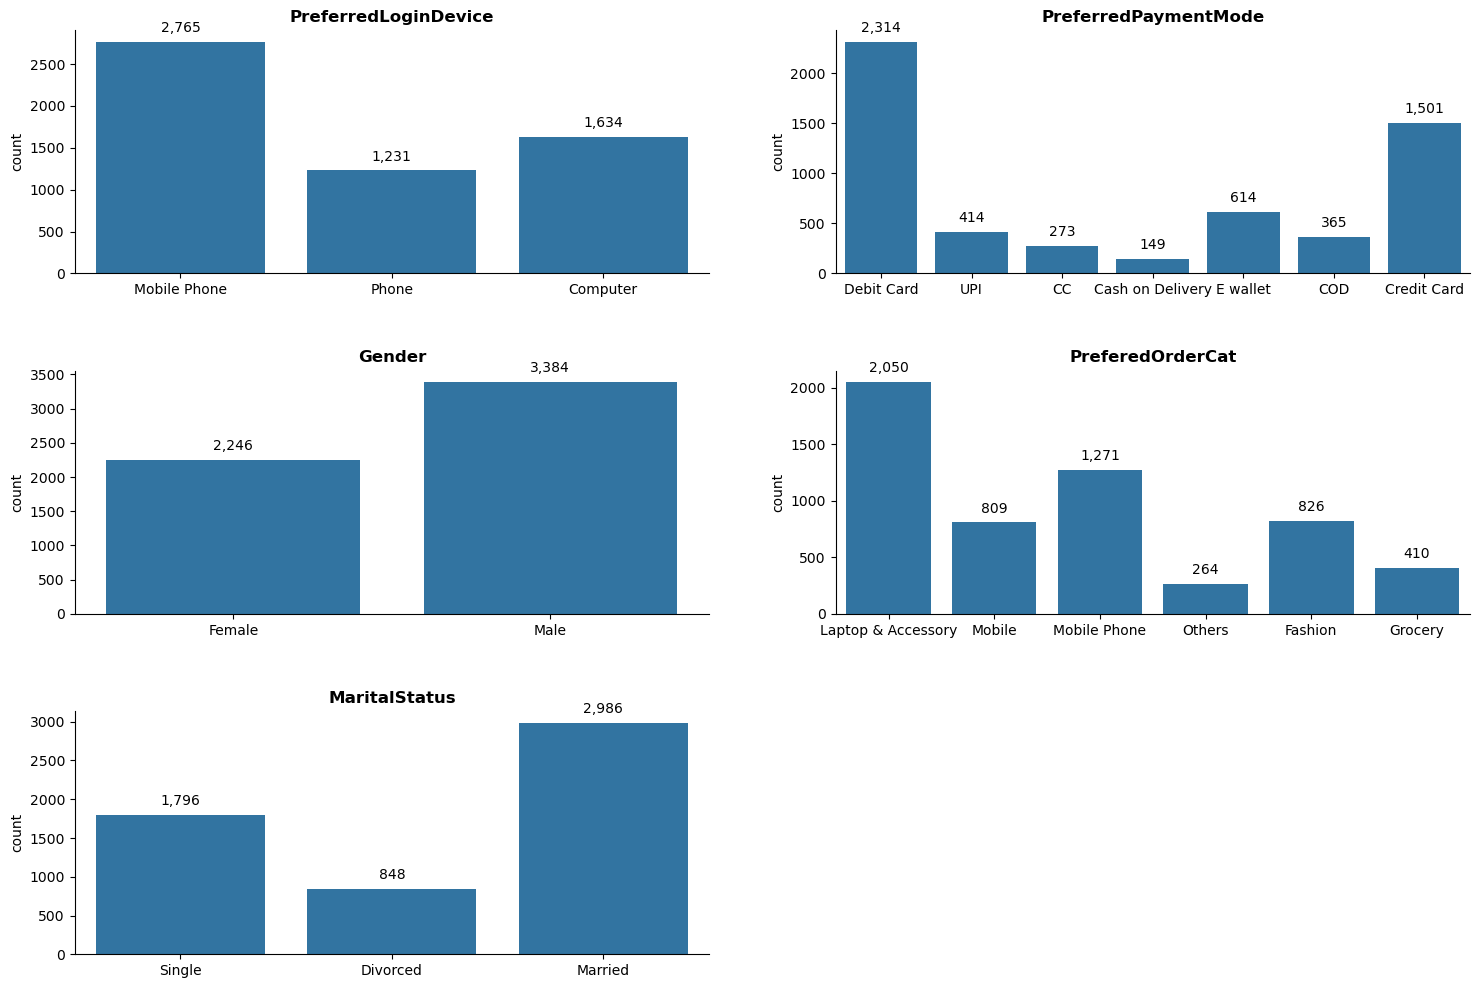

In [9]:
#Visualization Categorical Columns
plt.figure(figsize=(18,12))
for vis_cat in range(0, len(cat_colomns)):
    plt.subplot(3,2,vis_cat+1)
    plt.subplots_adjust(hspace=0.4)
    vis = sns.countplot(data=data, x=cat_colomns[vis_cat])
    sns.despine()
    plt.xlabel("")
    plt.title(cat_colomns[vis_cat], weight='bold')
    show_annot('simple annotate', vis)

plt.show()

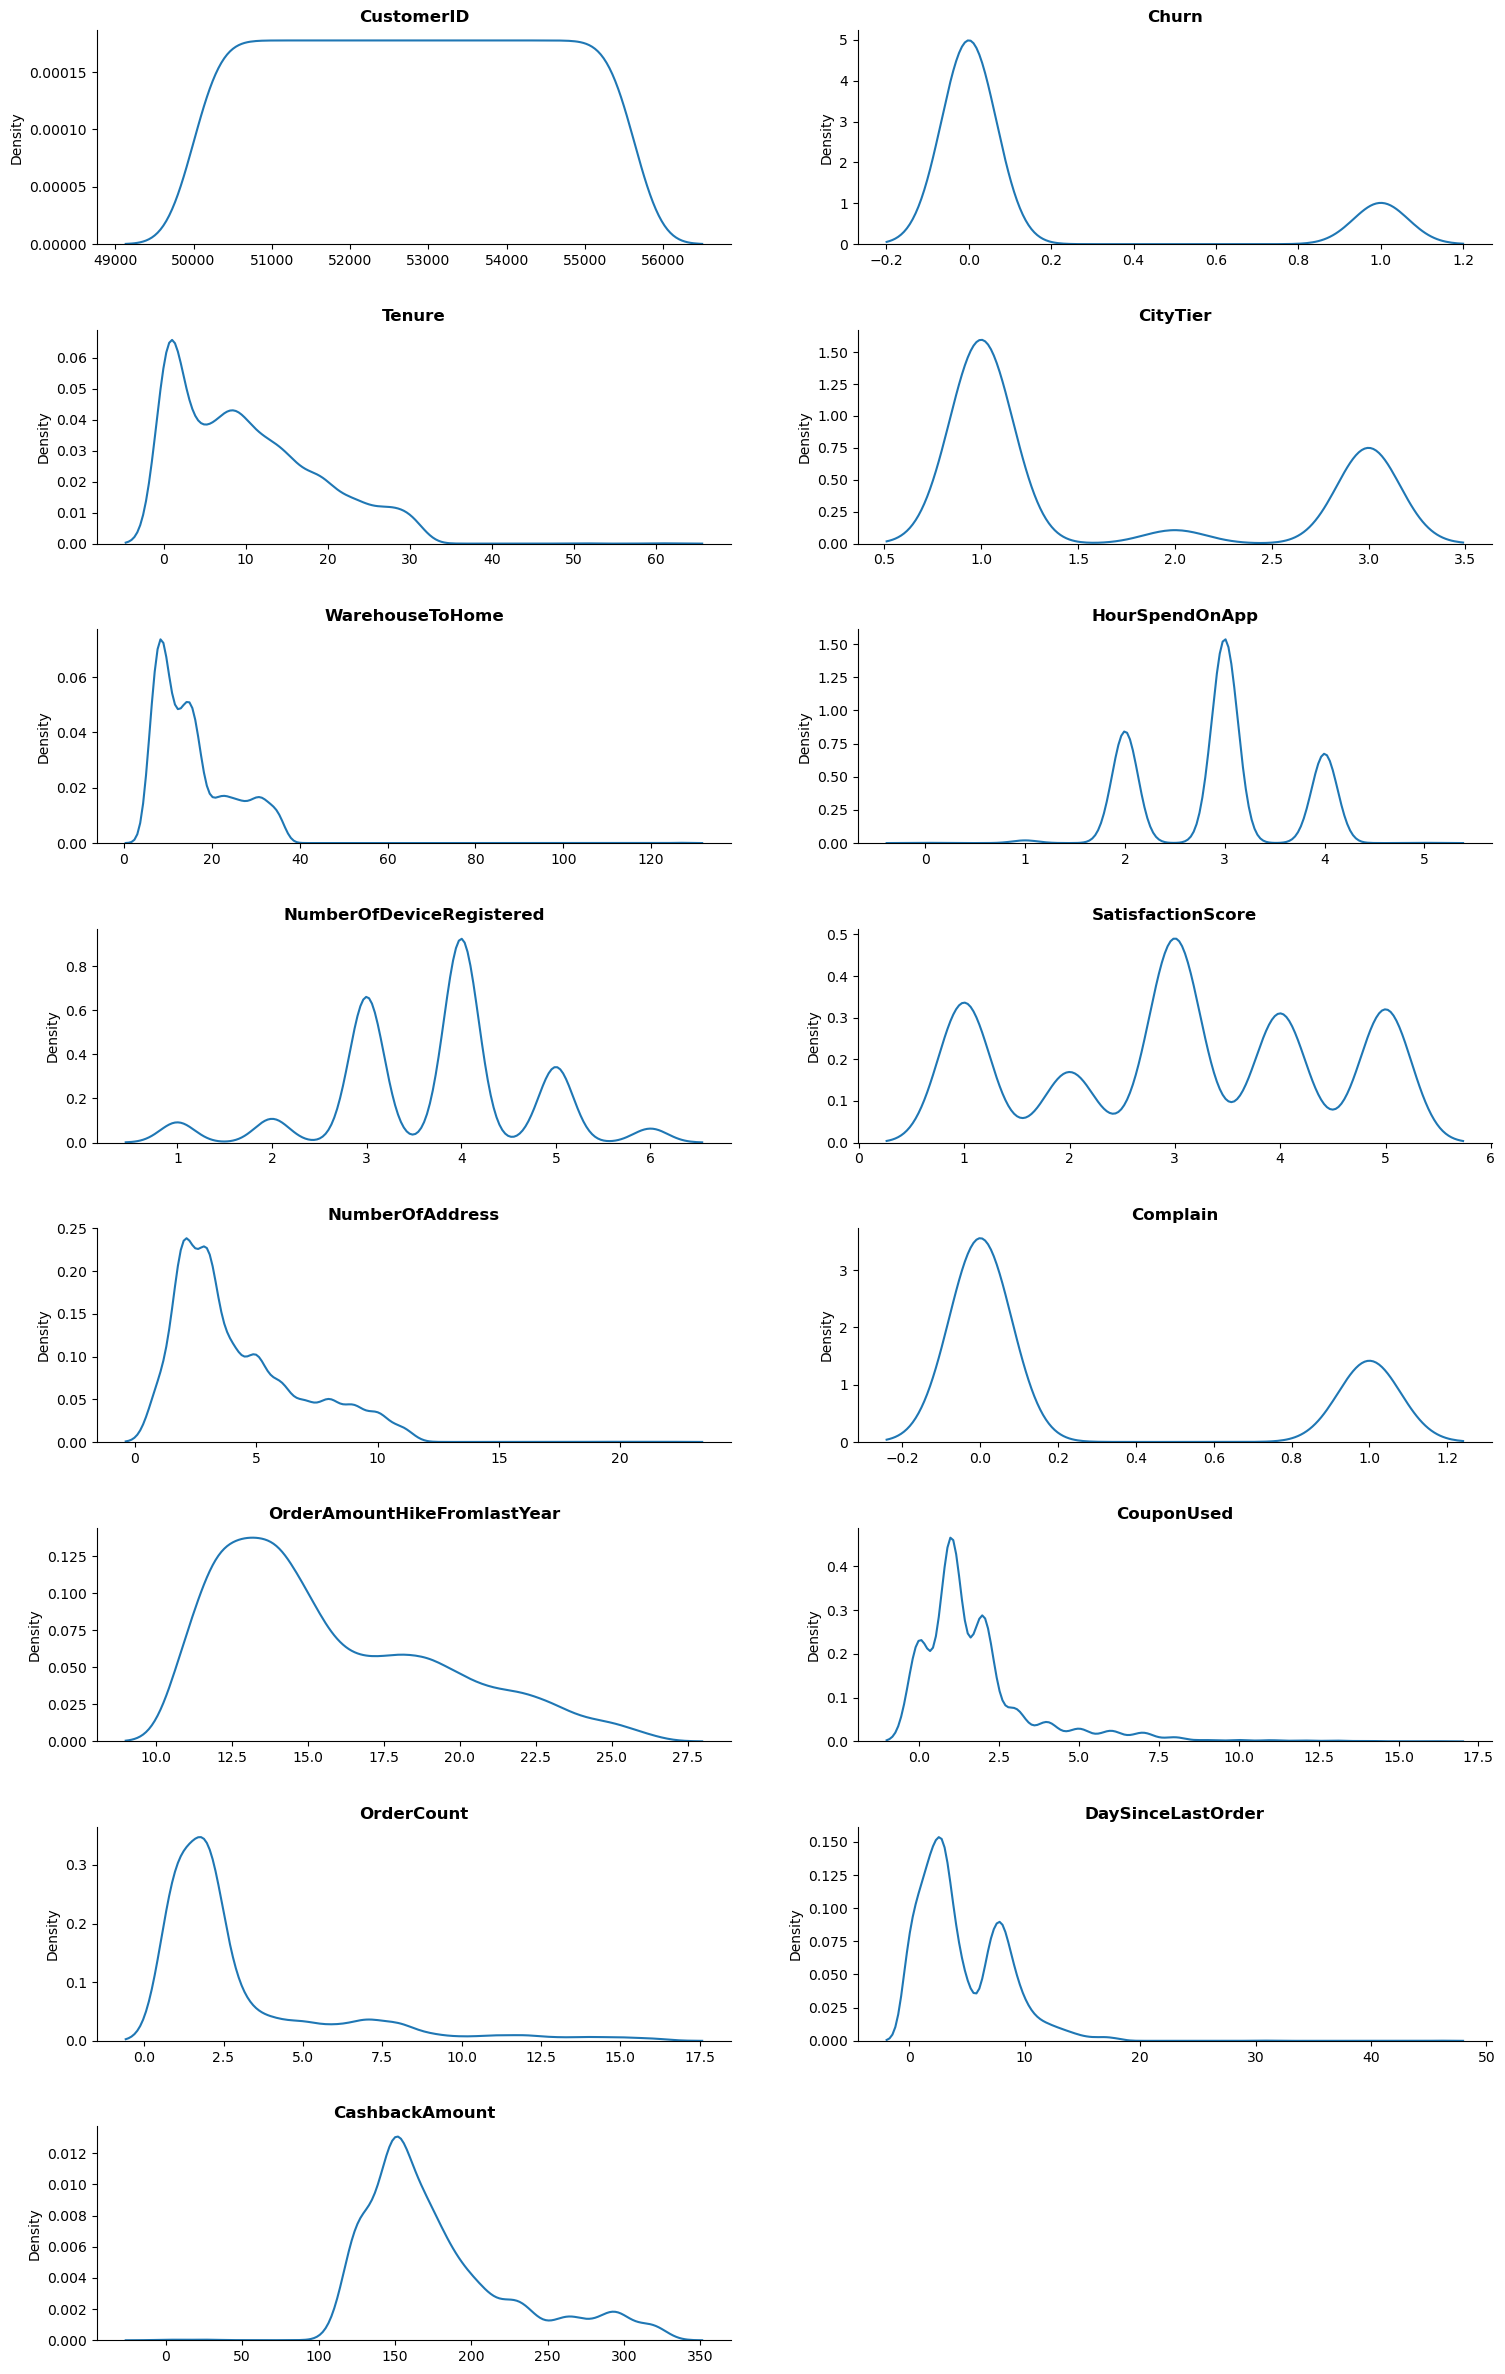

In [10]:
#Visualization Numerical Value 
plt.figure(figsize=(18,30))
for vis_num in range(0, len(num_colomns)):
    plt.subplot(8,2,vis_num+1)
    plt.subplots_adjust(hspace=0.4)
    vis = sns.kdeplot(data=data, x=num_colomns[vis_num])
    sns.despine()
    plt.xlabel("")
    plt.title(num_colomns[vis_num], weight='bold')

plt.show()

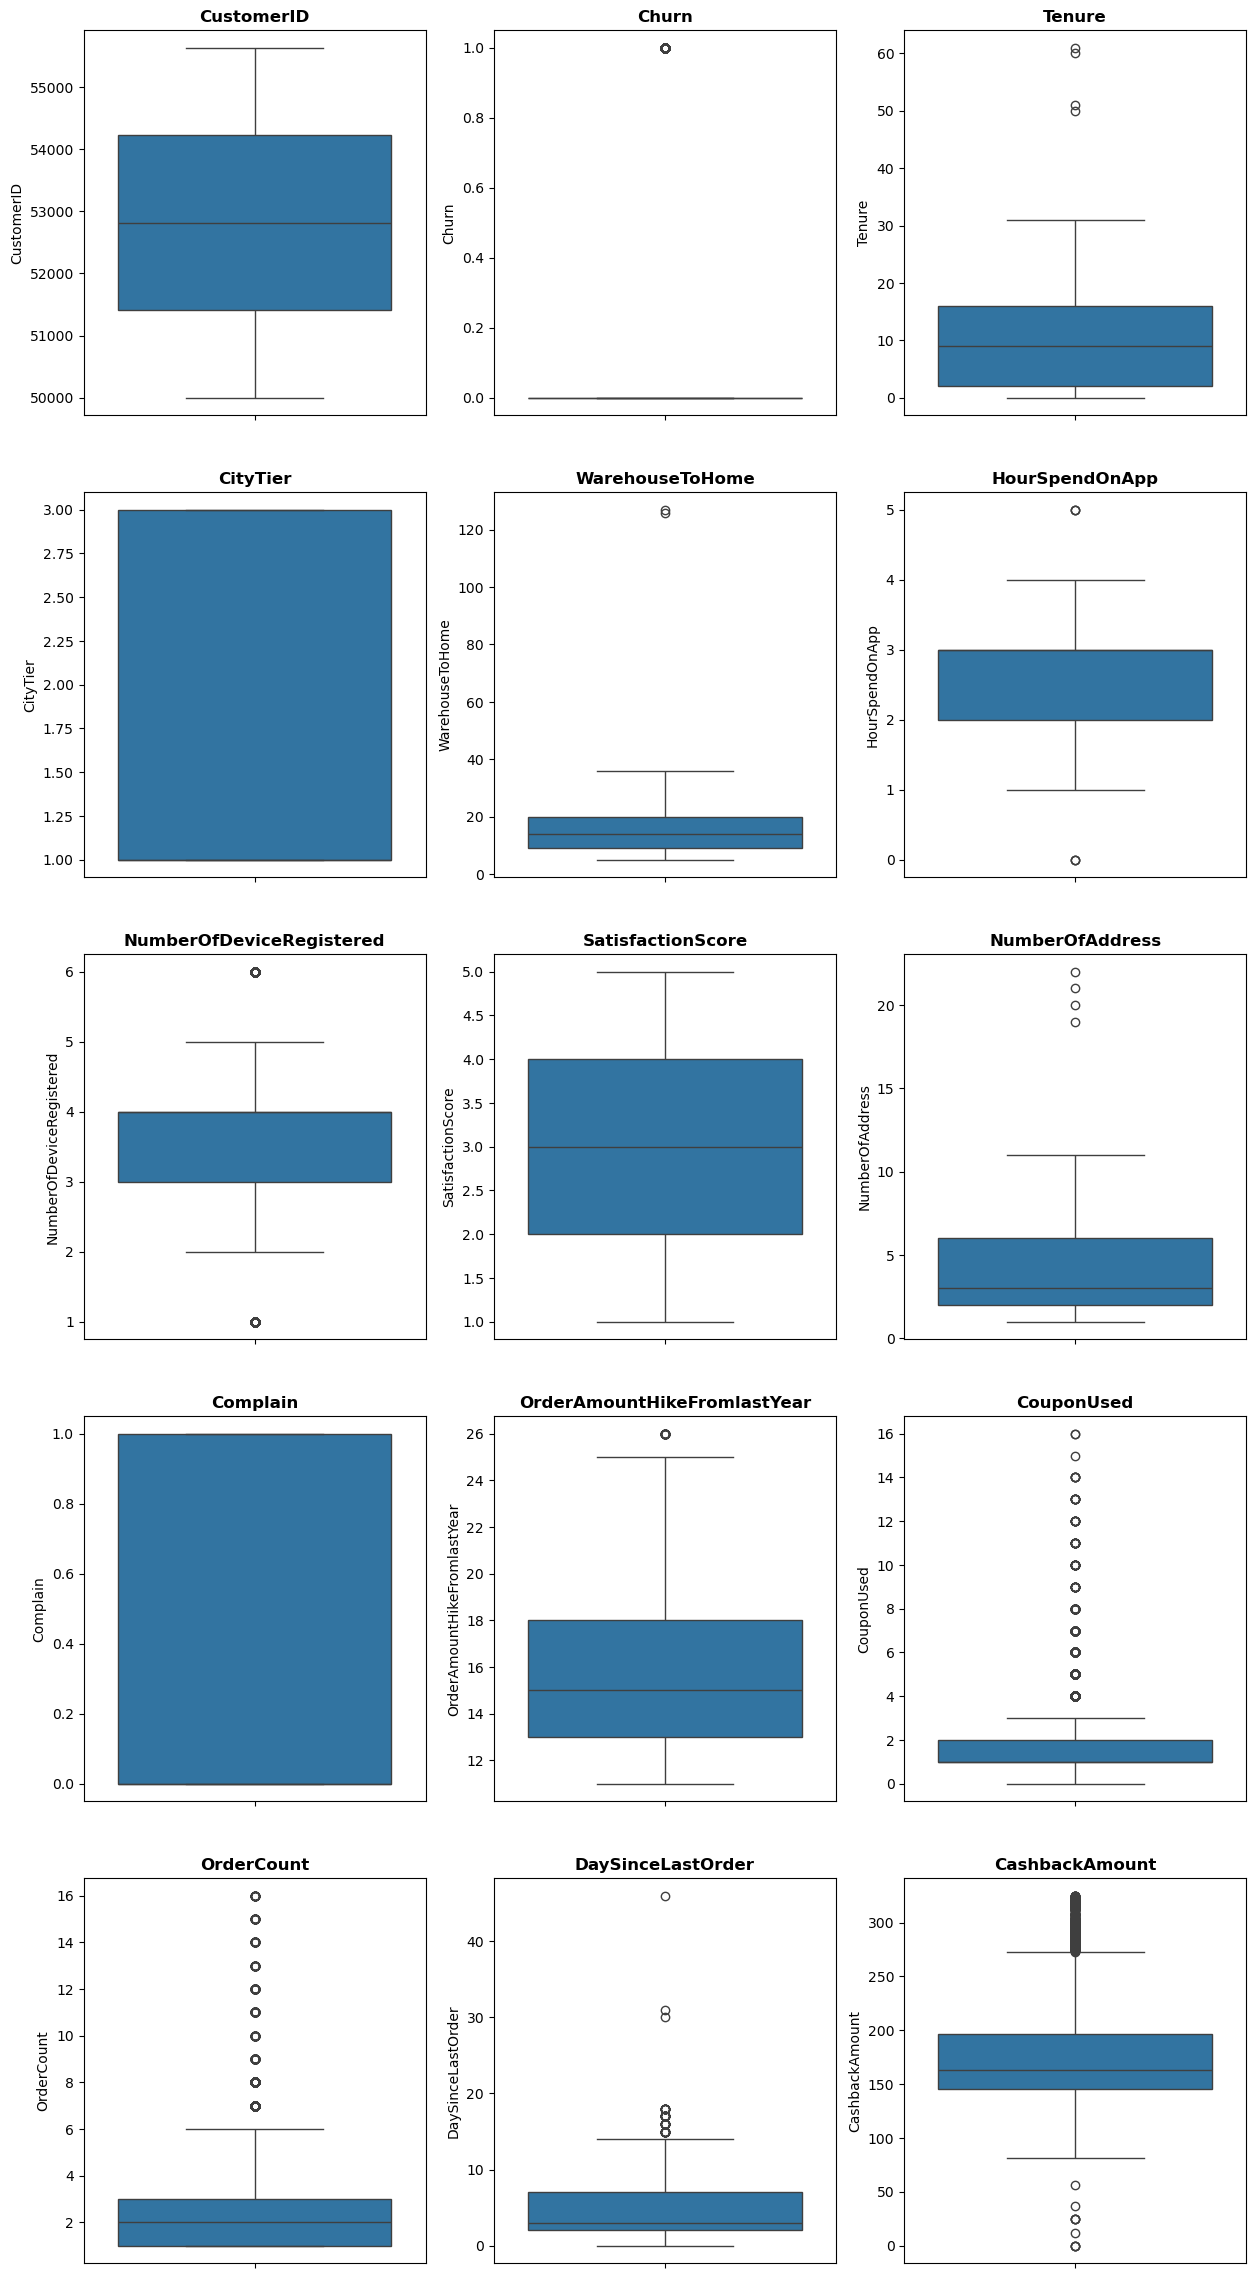

In [11]:
#Visualization Columns Have Outlier
plt.figure(figsize=(15,35))
for box_vis in range(0, len(num_colomns)):
    plt.subplot(6,3,box_vis+1)
    sns.boxplot(data[num_colomns[box_vis]])
    plt.title(num_colomns[box_vis], weight='bold')

plt.show()

### Bivariate Analysis

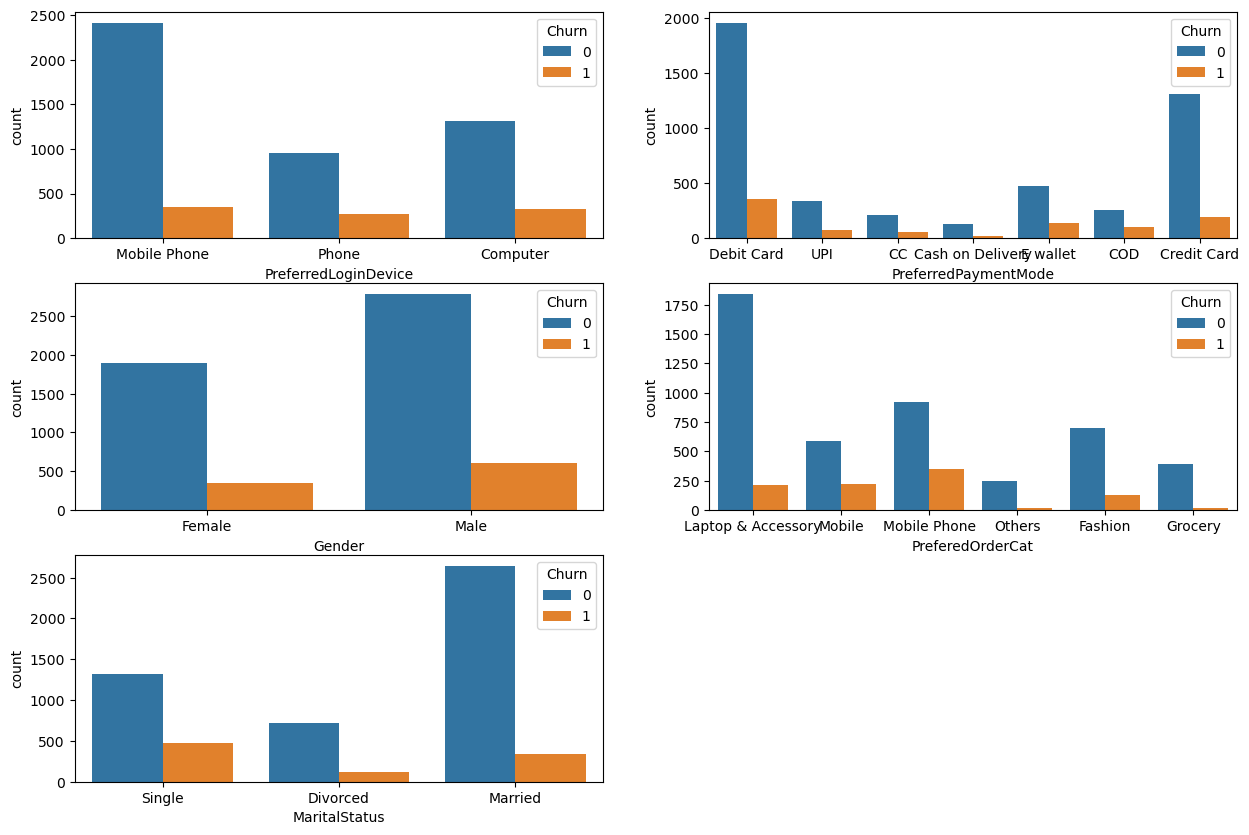

In [12]:
plt.figure(figsize=(15,10))

for cat_biv in range(0, len(cat_colomns)):
    plt.subplot(3,2,cat_biv+1)
    sns.countplot(data=data, x=cat_colomns[cat_biv], hue='Churn')

plt.show()

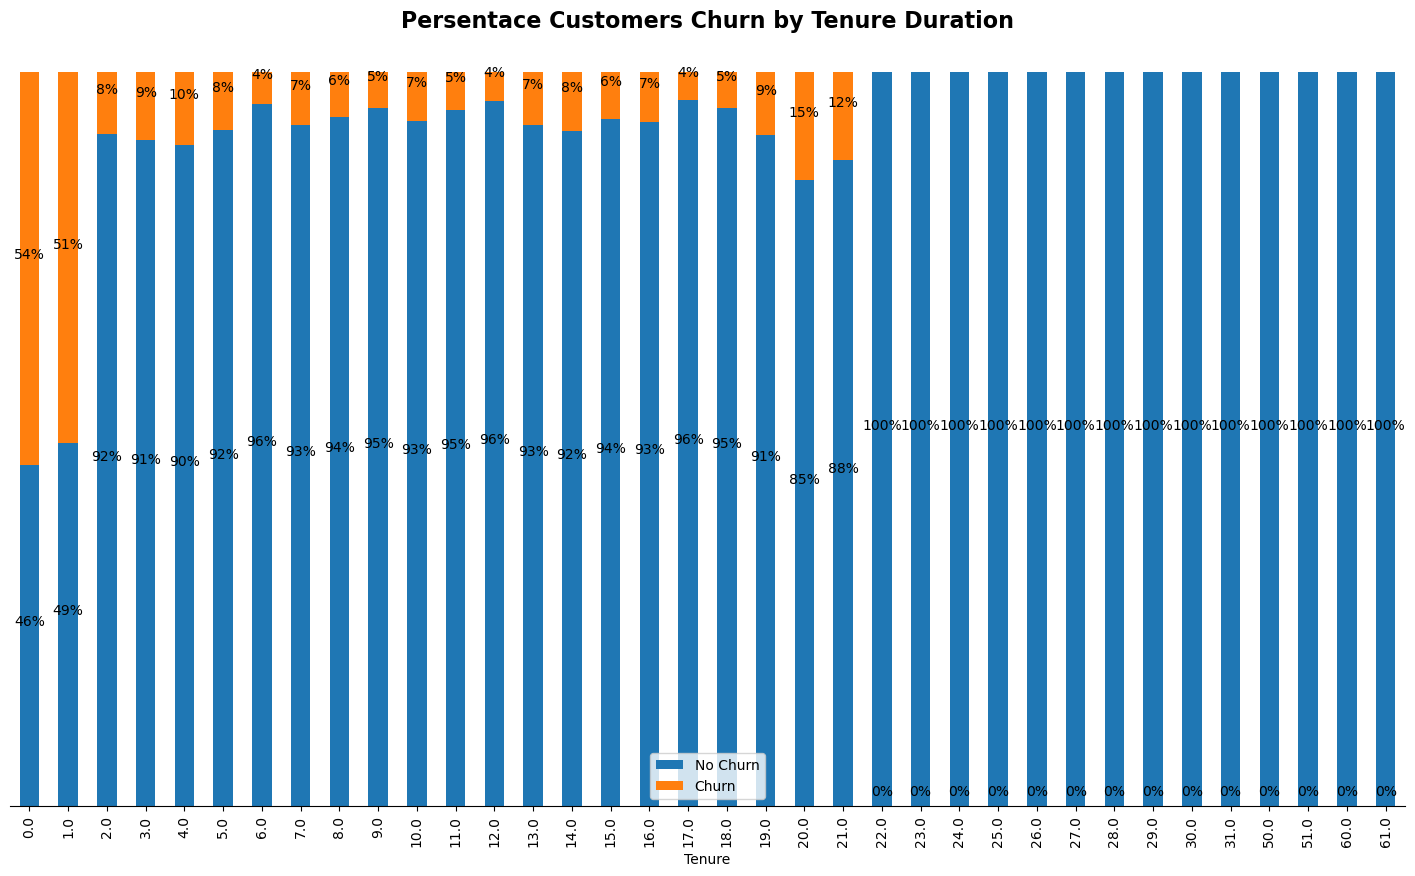

In [13]:
#Group Tenure
df_tenure = data.groupby(['Tenure', 'Churn']).size().unstack()
df_tenure = (df_tenure.div(df_tenure.sum(axis=1), axis=0) * 100)
df_tenure

#Visualization Feature Tenure
ax = df_tenure.plot(kind='bar', stacked=True, figsize=(18,10))
plt.title("Persentace Customers Churn by Tenure Duration", weight='bold', fontsize=16)
sns.despine(left=True)
plt.yticks([])
plt.legend(['No Churn','Churn'], loc='lower center')
show_annot('percentage annotate', ax)

plt.show()

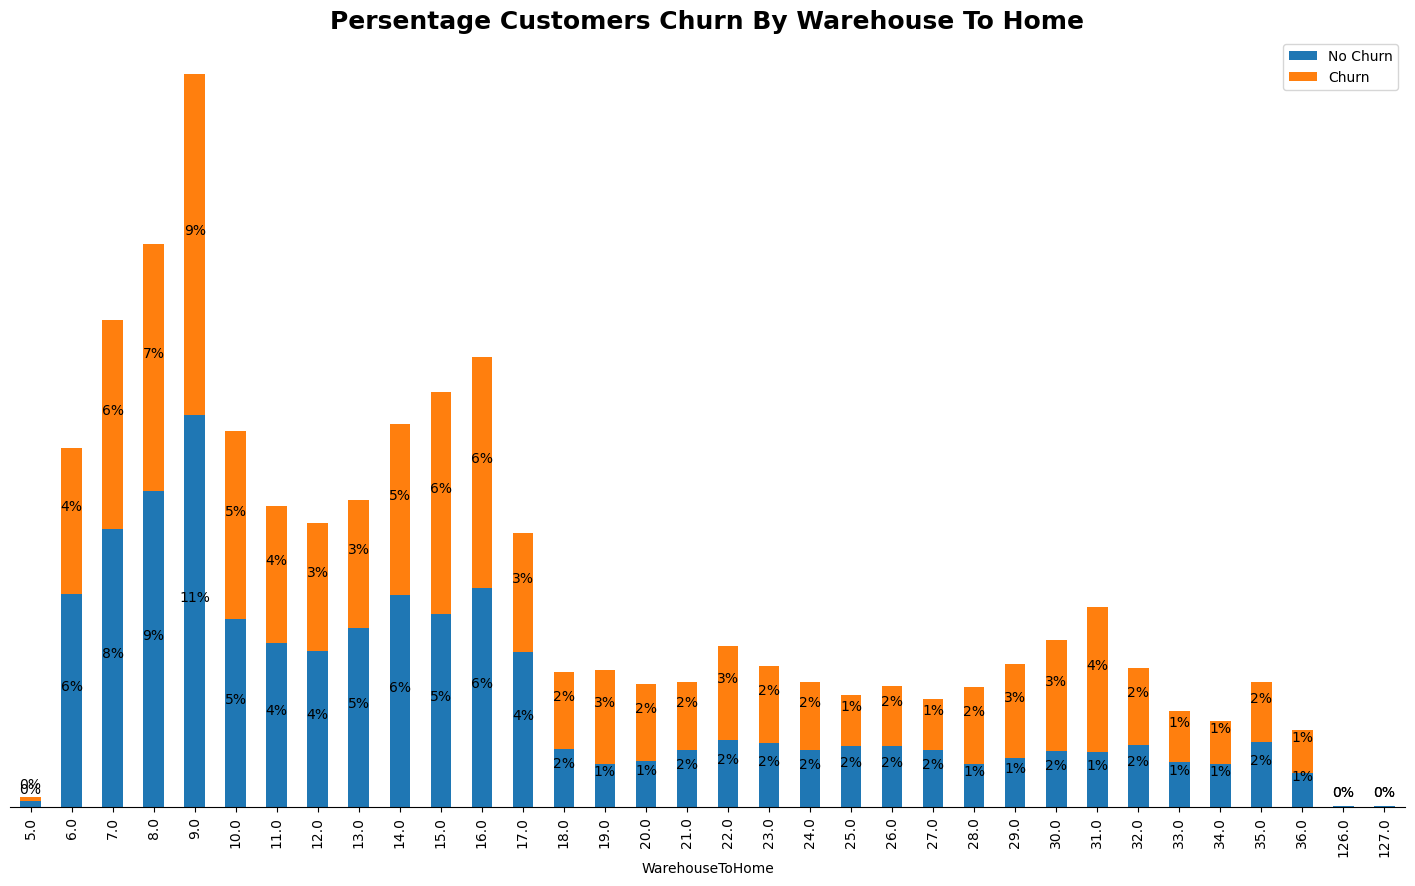

In [14]:
#Percentage Grup by WarehouseToHome
df_whome = data.groupby(['WarehouseToHome','Churn',]).size().reset_index(name='sum')
df_whome['total'] = df_whome.groupby('Churn')['sum'].transform(sum)
df_whome['percentage'] = round(((df_whome['sum']/df_whome['total'])*100), 2)

df_piv_whome = df_whome.pivot_table(index='WarehouseToHome', columns='Churn', values='percentage')

#Visualization WarehouseToHome Vs Churn
ax_whome = df_piv_whome.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.title("Persentage Customers Churn By Warehouse To Home", weight='bold', fontsize=18)
show_annot('percentage annotate', ax_whome)


plt.show()

semakin jauh jaraknya kemungkinan churn semakin tinggi

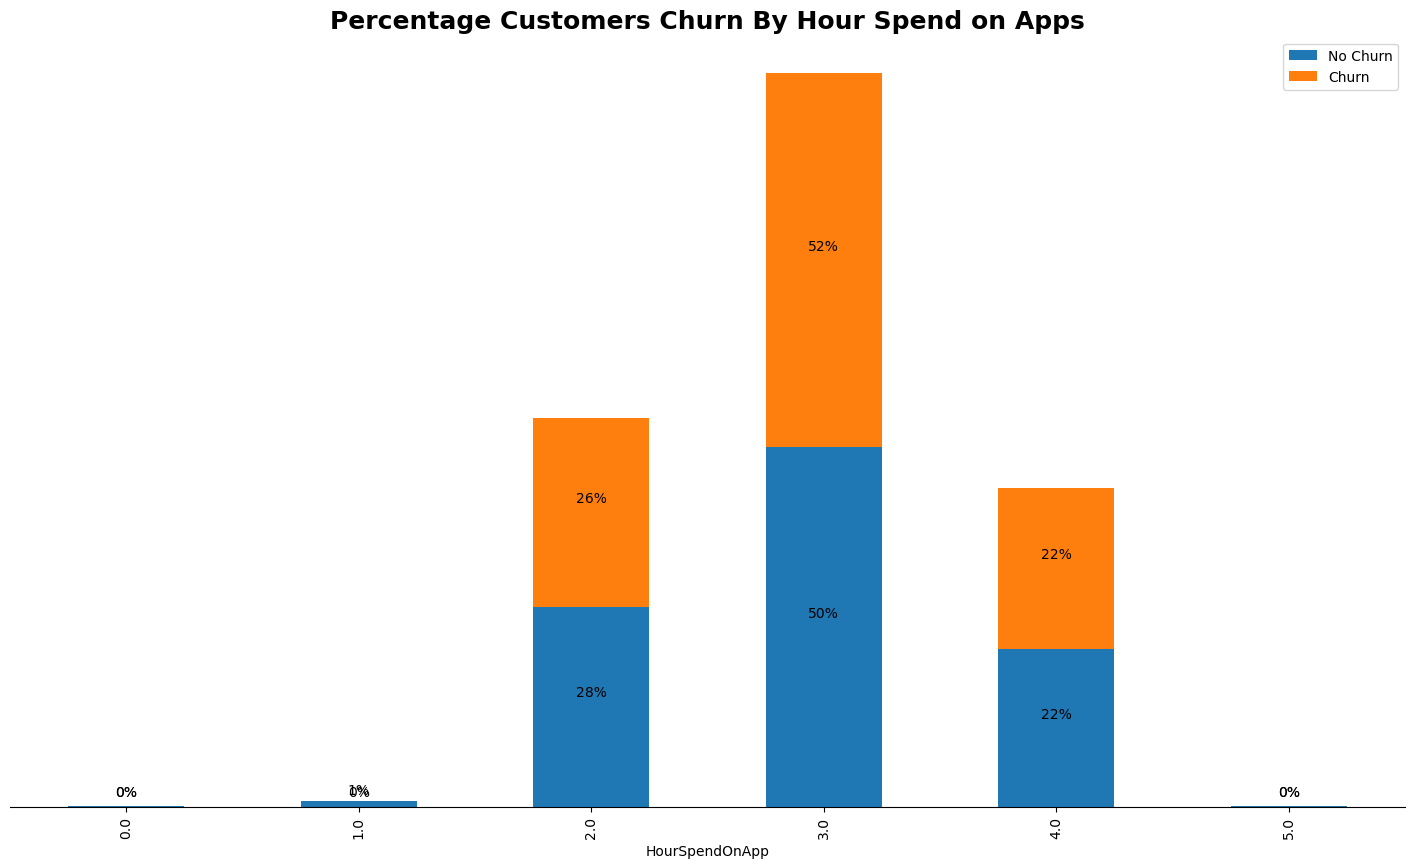

In [15]:
df_spenapp = data.groupby(['HourSpendOnApp', 'Churn']).size().reset_index(name='sum')
df_spenapp['total'] = df_spenapp.groupby('Churn')['sum'].transform(sum)
df_spenapp['percentage'] = round(((df_spenapp['sum']/df_spenapp['total'])*100), 2)

df_piv_spenapp = df_spenapp.pivot_table(index='HourSpendOnApp', columns='Churn', values='percentage')

ax_spenapp = df_piv_spenapp.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Hour Spend on Apps", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='upper right')
show_annot('percentage annotate', ax_spenapp)

plt.show()

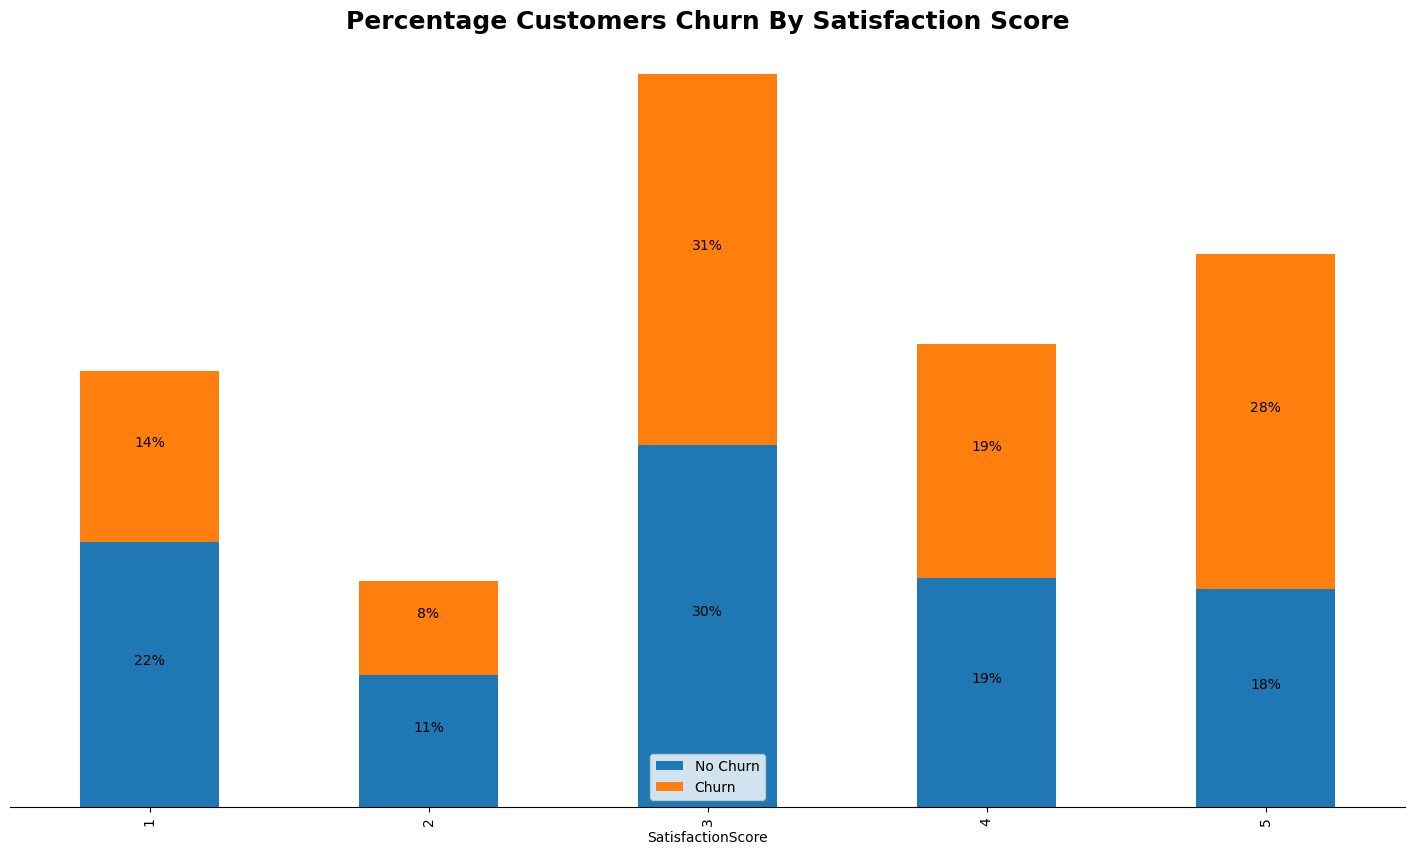

In [16]:
df_satis = data.groupby(['SatisfactionScore', 'Churn']).size().reset_index(name='sum')
df_satis['total'] = df_satis.groupby('Churn')['sum'].transform(sum)
df_satis['percentage'] = round(((df_satis['sum']/df_satis['total'])*100), 2)

df_piv_satis = df_satis.pivot_table(index='SatisfactionScore', columns='Churn', values='percentage')

ax_satis = df_piv_satis.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Satisfaction Score", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='lower center')
show_annot('percentage annotate', ax_satis)

plt.show()

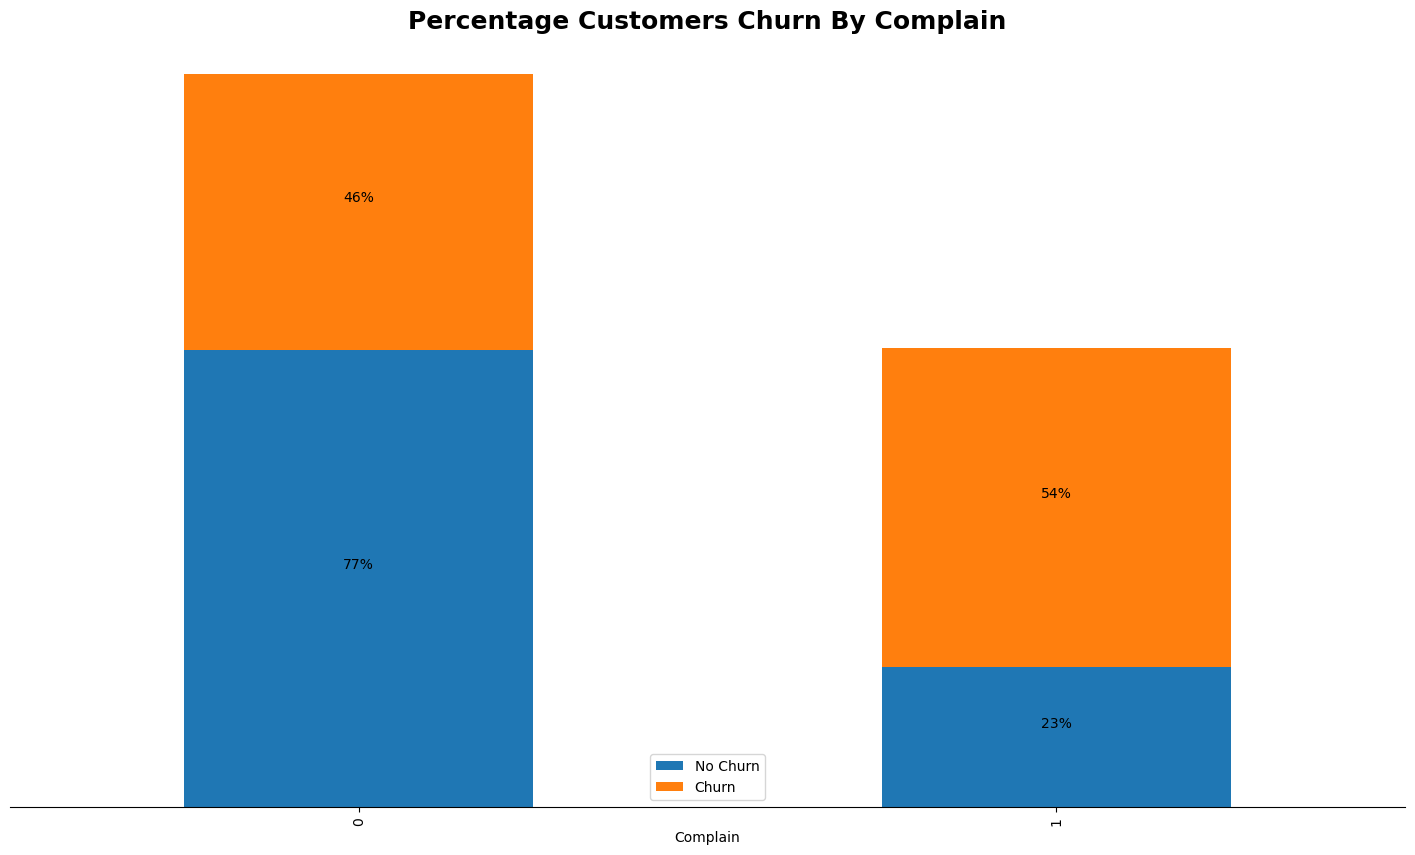

In [17]:
df_complain = data.groupby(['Complain', 'Churn']).size().reset_index(name='sum')
df_complain['total'] = df_complain.groupby('Churn')['sum'].transform(sum)
df_complain['percentage'] = round(((df_complain['sum']/df_complain['total'])*100), 2)

df_piv_complain = df_complain.pivot_table(index='Complain', columns='Churn', values='percentage')

ax_complain = df_piv_complain.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Complain", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='lower center')
show_annot('percentage annotate', ax_complain)

plt.show()

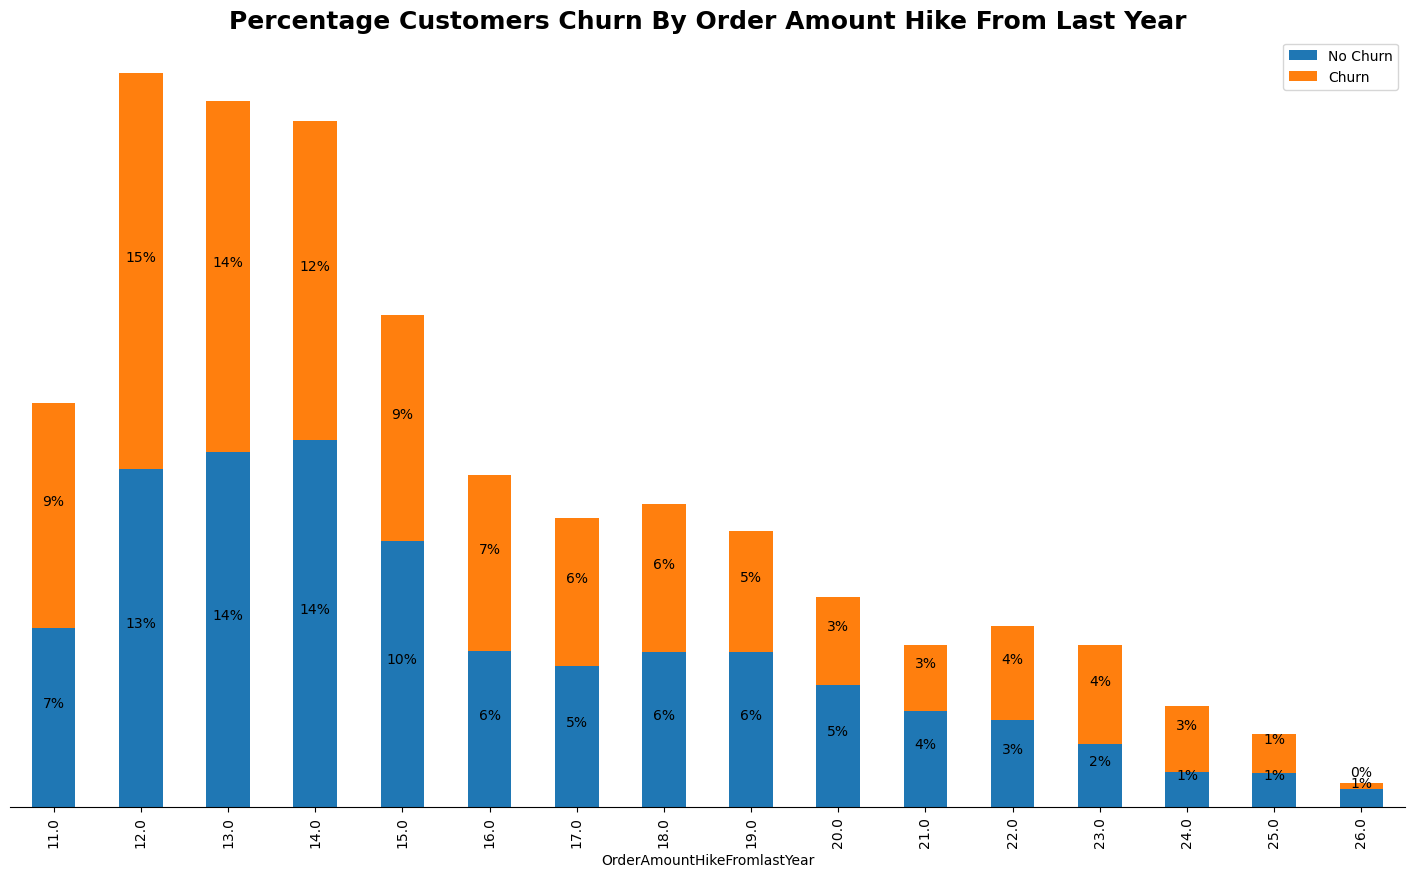

In [18]:
df_orderlast = data.groupby(['OrderAmountHikeFromlastYear', 'Churn']).size().reset_index(name='sum')
df_orderlast['total'] = df_orderlast.groupby('Churn')['sum'].transform(sum)
df_orderlast['percentage'] = round(((df_orderlast['sum']/df_orderlast['total'])*100), 2)

df_piv_orderlast = df_orderlast.pivot_table(index='OrderAmountHikeFromlastYear', columns='Churn', values='percentage')

ax_orderlast = df_piv_orderlast.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Order Amount Hike From Last Year", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='upper right')
show_annot('percentage annotate', ax_orderlast)

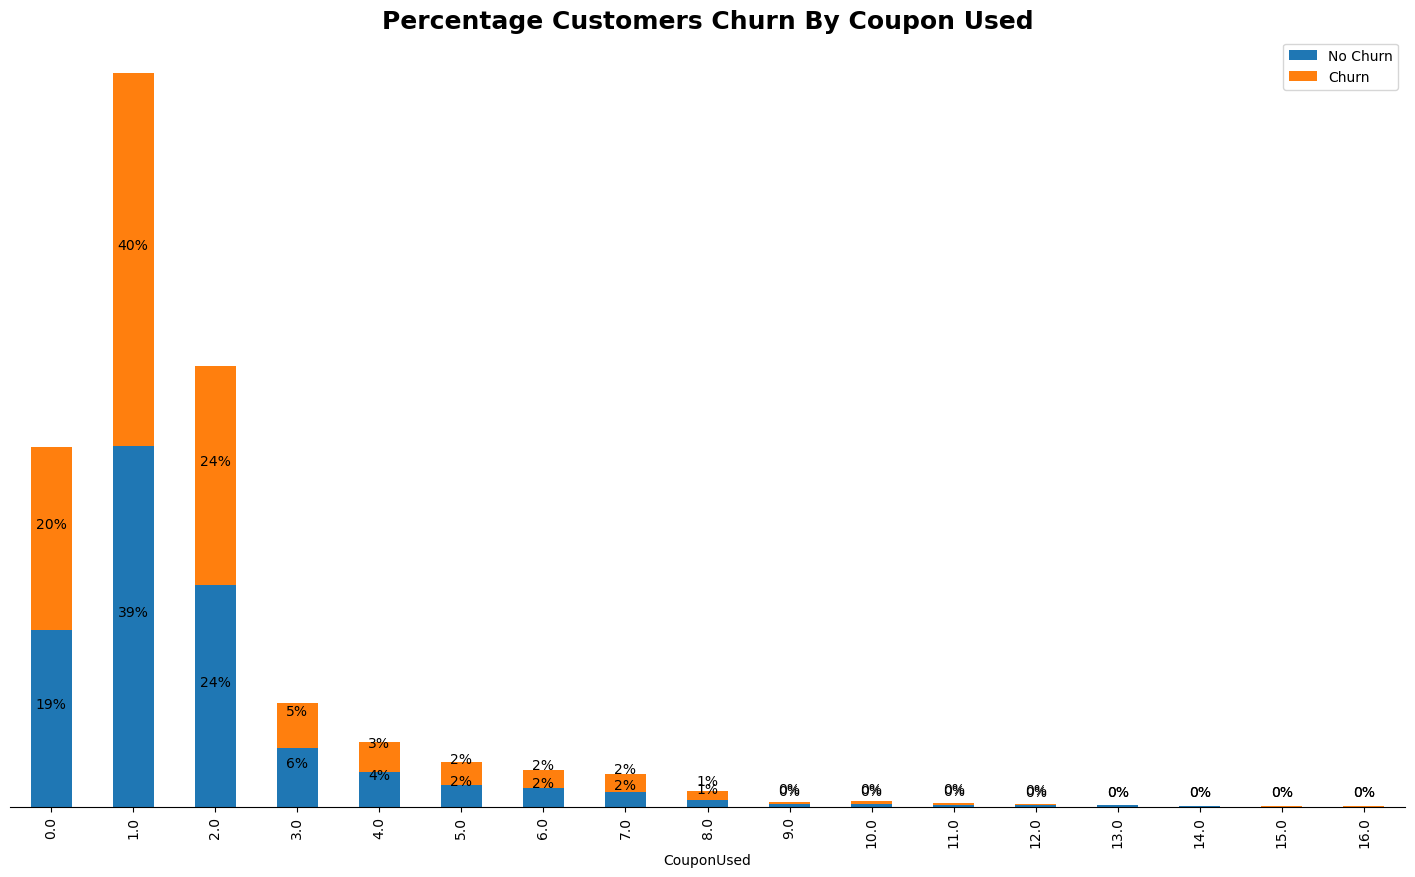

In [19]:
df_coupon = data.groupby(['CouponUsed', 'Churn']).size().reset_index(name='sum')
df_coupon['total'] = df_coupon.groupby('Churn')['sum'].transform(sum)
df_coupon['percentage'] = round(((df_coupon['sum']/df_coupon['total'])*100), 2)

df_piv_coupon = df_coupon.pivot_table(index='CouponUsed', columns='Churn', values='percentage')

ax_coupon = df_piv_coupon.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Coupon Used", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='upper right')
show_annot('percentage annotate', ax_coupon)

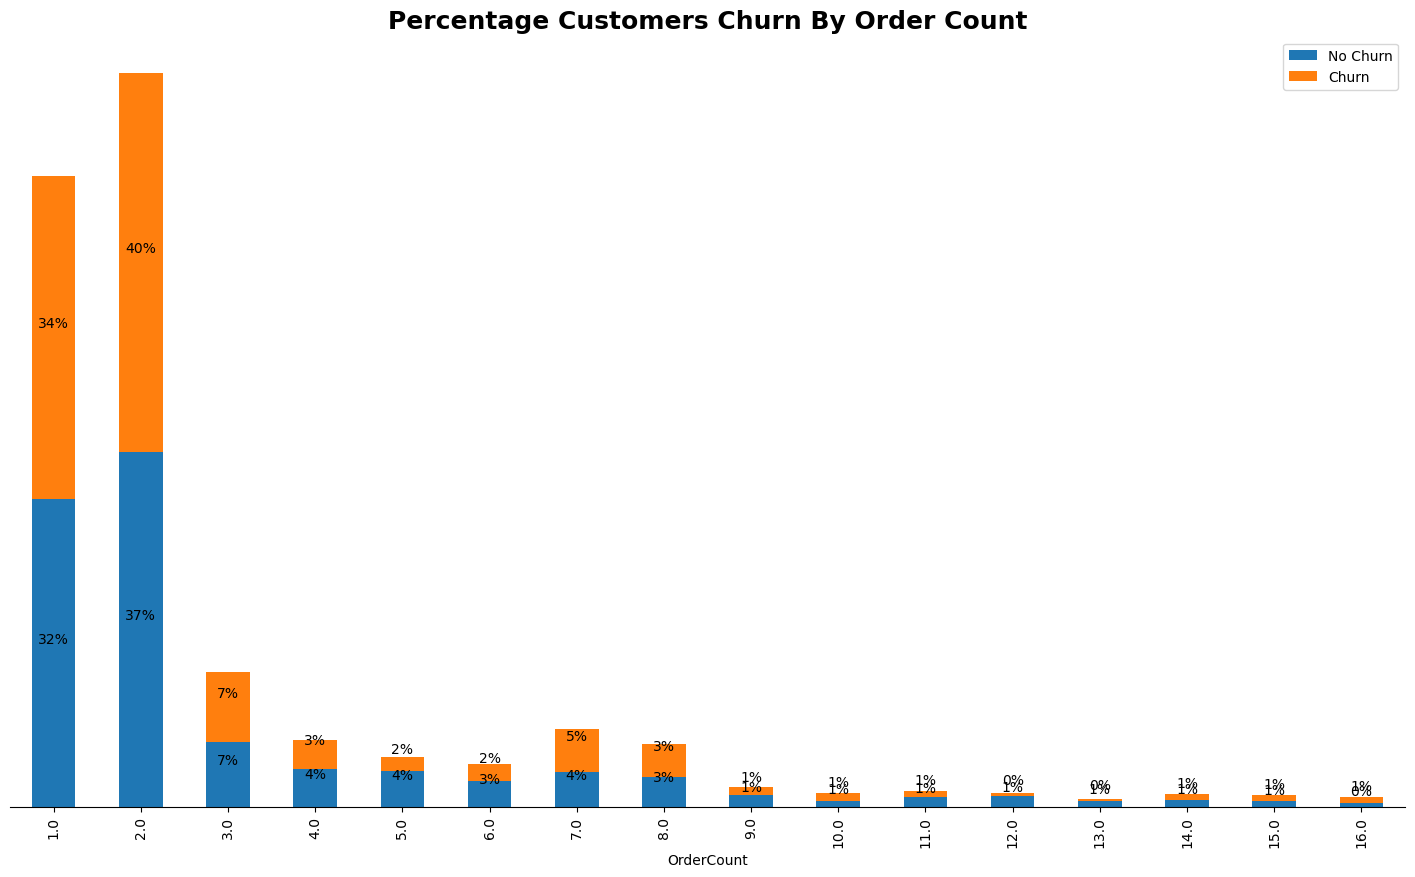

In [20]:
df_order = data.groupby(['OrderCount', 'Churn']).size().reset_index(name='sum')
df_order['total'] = df_order.groupby('Churn')['sum'].transform(sum)
df_order['percentage'] = round(((df_order['sum']/df_order['total'])*100), 2)

df_piv_order = df_order.pivot_table(index='OrderCount', columns='Churn', values='percentage')

ax_order = df_piv_order.plot(kind='bar', stacked=True, figsize=(18,10))
sns.despine(left=True)
plt.title("Percentage Customers Churn By Order Count", weight='bold', fontsize=18)
plt.yticks([])
plt.legend(['No Churn', 'Churn'], loc='upper right')
show_annot('percentage annotate', ax_order)

In [21]:
cashback = []

for cash in data['CashbackAmount']:
    if cash <= 50:
        val = 'Tier 7'
    elif cash > 50 and cash <= 100:
        val = 'Tier 6'
    elif cash > 100 and cash <= 150:
        val = 'Tier 5'
    elif cash > 150 and cash <= 200:
        val = 'Tier 4'
    elif cash > 200 and cash <= 250:
        val = 'Tier 3'
    elif cash > 250 and cash <= 300:
        val = 'Tier 2'
    else :
        val = 'Tier 1'
    cashback.append(val)

df_cashback = data
df_cashback['Cashback_Tier'] = cashback

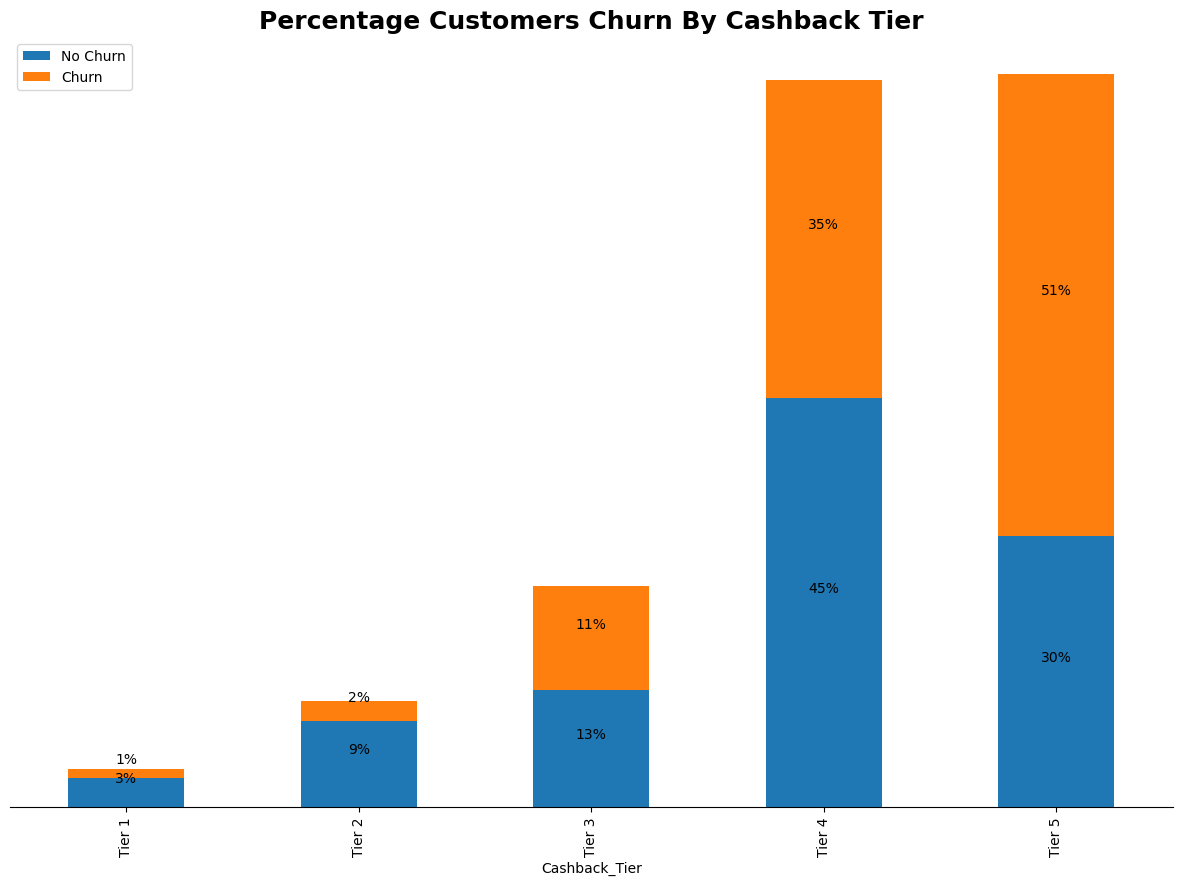

In [22]:
df_a = df_cashback.groupby(['Cashback_Tier','Churn']).size().reset_index(name='sum')
df_a['total'] = df_a.groupby('Churn')['sum'].transform('sum')
df_a['percentage'] = (df_a['sum']/df_a['total'])*100
df_a = df_a.loc[:9]

df_piv = df_a.pivot_table(index='Cashback_Tier', columns='Churn', values='percentage')

ax_cash11 = df_piv.plot(kind='bar', stacked=True, figsize=(15,10))
sns.despine(left=True)
plt.yticks([])
plt.title("Percentage Customers Churn By Cashback Tier", weight='bold', fontsize=18)
plt.legend(['No Churn', 'Churn'], loc='upper left')
show_annot('percentage annotate', ax_cash11)

plt.show()

### Multivariate Analysis

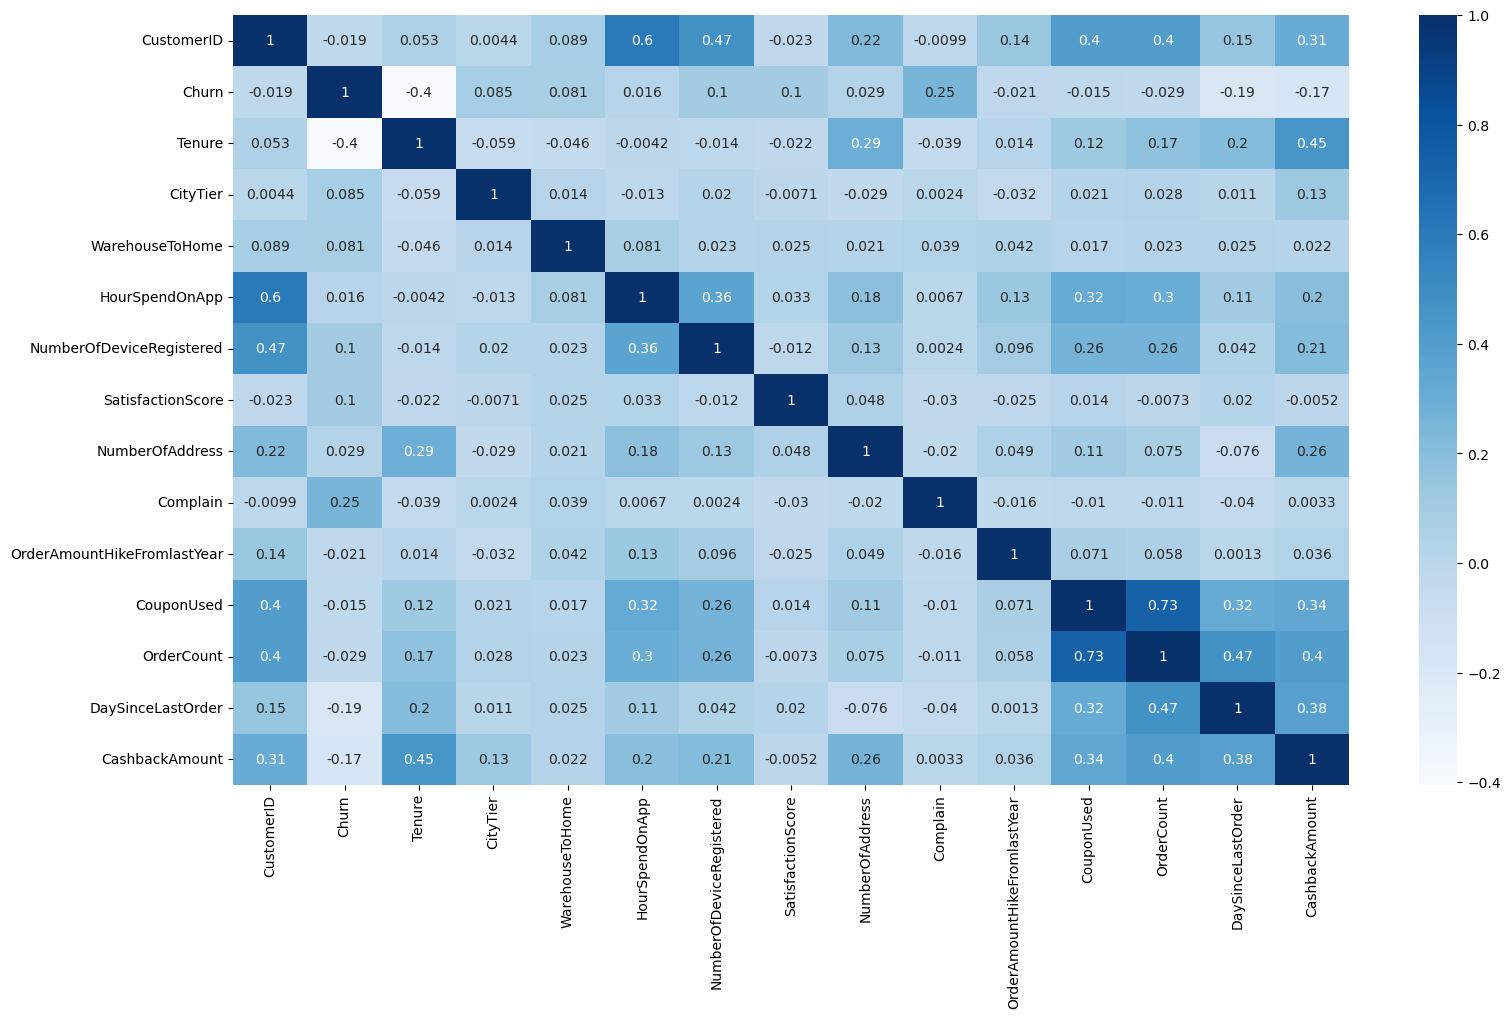

In [23]:
df_corr = data.corr(method='spearman')

plt.figure(figsize=(18,10))
sns.heatmap(df_corr, annot=True, cmap='Blues')

plt.show()

### Data Preprocessing

#### Handling Missing Value

In [24]:
col_all = data.columns

for miss_val in range(0, len(col_all)):
    print(f"Columns : {col_all[miss_val]}")
    print(f"Total Missing Value : {data[col_all[miss_val]].isnull().sum()}")
    print(f"Percentage Missing value : {round((((data[col_all[miss_val]].isnull().sum())/data[col_all[miss_val]].shape[0])*100), 2)}%")
    print("")

Columns : CustomerID
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Churn
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Tenure
Total Missing Value : 264
Percentage Missing value : 4.69%

Columns : PreferredLoginDevice
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : CityTier
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : WarehouseToHome
Total Missing Value : 251
Percentage Missing value : 4.46%

Columns : PreferredPaymentMode
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Gender
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : HourSpendOnApp
Total Missing Value : 255
Percentage Missing value : 4.53%

Columns : NumberOfDeviceRegistered
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : PreferedOrderCat
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : SatisfactionScore
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Mari

In [25]:
med = ['Tenure',
       'WarehouseToHome',
       'OrderAmountHikeFromlastYear',
       'CouponUsed',
       'OrderCount']

for hand_mis in range(0, len(med)):
    data[med[hand_mis]].fillna(data[med[hand_mis]].median(), inplace=True)

data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mode()[0], inplace=True)

In [26]:
col_all = data.columns

for miss_val in range(0, len(col_all)):
    print(f"Columns : {col_all[miss_val]}")
    print(f"Total Missing Value : {data[col_all[miss_val]].isnull().sum()}")
    print(f"Percentage Missing value : {round((((data[col_all[miss_val]].isnull().sum())/data[col_all[miss_val]].shape[0])*100), 2)}%")
    print("")

Columns : CustomerID
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Churn
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Tenure
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : PreferredLoginDevice
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : CityTier
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : WarehouseToHome
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : PreferredPaymentMode
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : Gender
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : HourSpendOnApp
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : NumberOfDeviceRegistered
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : PreferedOrderCat
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : SatisfactionScore
Total Missing Value : 0
Percentage Missing value : 0.0%

Columns : MaritalStatus

#### Handling Duplicated Data

In [27]:
print(f"Data Duplicate : {data.duplicated(subset='CustomerID').sum()}")

Data Duplicate : 0


#### Handling Format Data

In [28]:
val_payment = {'Cash on Delivery' : 'COD',
               'CC' : 'Credit Card'}
data['PreferredPaymentMode'].replace(val_payment, inplace=True)
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'COD', 'E wallet'],
      dtype=object)

#### Handling Outlier

In [29]:
data1 = data.copy()
df_outlama = data1[['Tenure',
                   'WarehouseToHome',
                   'HourSpendOnApp',
                   'NumberOfDeviceRegistered',
                   'NumberOfAddress',
                   'OrderAmountHikeFromlastYear',
                   'CouponUsed',
                   'OrderCount',
                   'CashbackAmount']]
df_outlama

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
0,4.0,6.0,3.0,3,9,11.0,1.0,1.0,159.93
1,9.0,8.0,3.0,4,7,15.0,0.0,1.0,120.90
2,9.0,30.0,2.0,4,6,14.0,0.0,1.0,120.28
3,0.0,15.0,2.0,4,8,23.0,0.0,1.0,134.07
4,0.0,12.0,3.0,3,3,11.0,1.0,1.0,129.60
...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2,6,18.0,1.0,2.0,150.71
5626,13.0,13.0,3.0,5,6,16.0,1.0,2.0,224.91
5627,1.0,11.0,3.0,2,3,21.0,1.0,2.0,186.42
5628,23.0,9.0,4.0,5,4,15.0,2.0,2.0,178.90


In [30]:
from scipy import stats

name_zscore = []

for outlier in num_colomns:
    zscore1 = abs(stats.zscore(data[outlier]))
    data[outlier + 'z_score'] = zscore1

for name in num_colomns:
    name_zscore.append(name+'z_score')

for nama in range(0, len(name_zscore)):
    if (data[name_zscore[nama]]>3).sum() != 0:
        print(f"Colom Outliers : {name_zscore[nama]}")


Colom Outliers : Tenurez_score
Colom Outliers : WarehouseToHomez_score
Colom Outliers : HourSpendOnAppz_score
Colom Outliers : NumberOfAddressz_score
Colom Outliers : CouponUsedz_score
Colom Outliers : OrderCountz_score
Colom Outliers : CashbackAmountz_score


In [31]:
print(f"Data Sebelum Handling : {len(df_outlama)}")

#Handling Outlier With Z_Score < 3
data = data[data['Tenurez_score']<3]
data = data[data['WarehouseToHomez_score']<3]
data = data[data['HourSpendOnAppz_score']<3]
data = data[data['NumberOfAddressz_score']<3]
data = data[data['CouponUsedz_score']<3]
data = data[data['OrderCountz_score']<3]
data = data[data['CashbackAmountz_score']<3]

#Drop
data.drop(columns=['CustomerIDz_score',
                   'Churnz_score',
                   'Tenurez_score',
                   'CityTierz_score',
                   'WarehouseToHomez_score',
                   'HourSpendOnAppz_score',
                   'NumberOfDeviceRegisteredz_score',
                   'SatisfactionScorez_score',
                   'NumberOfAddressz_score',
                   'Complainz_score',
                   'OrderAmountHikeFromlastYearz_score',
                   'CouponUsedz_score',
                   'OrderCountz_score',
                   'DaySinceLastOrderz_score',
                   'CashbackAmountz_score'], inplace=True)

print(f"Data Sesudah Handling : {len(data)}")

Data Sebelum Handling : 5630
Data Sesudah Handling : 5376


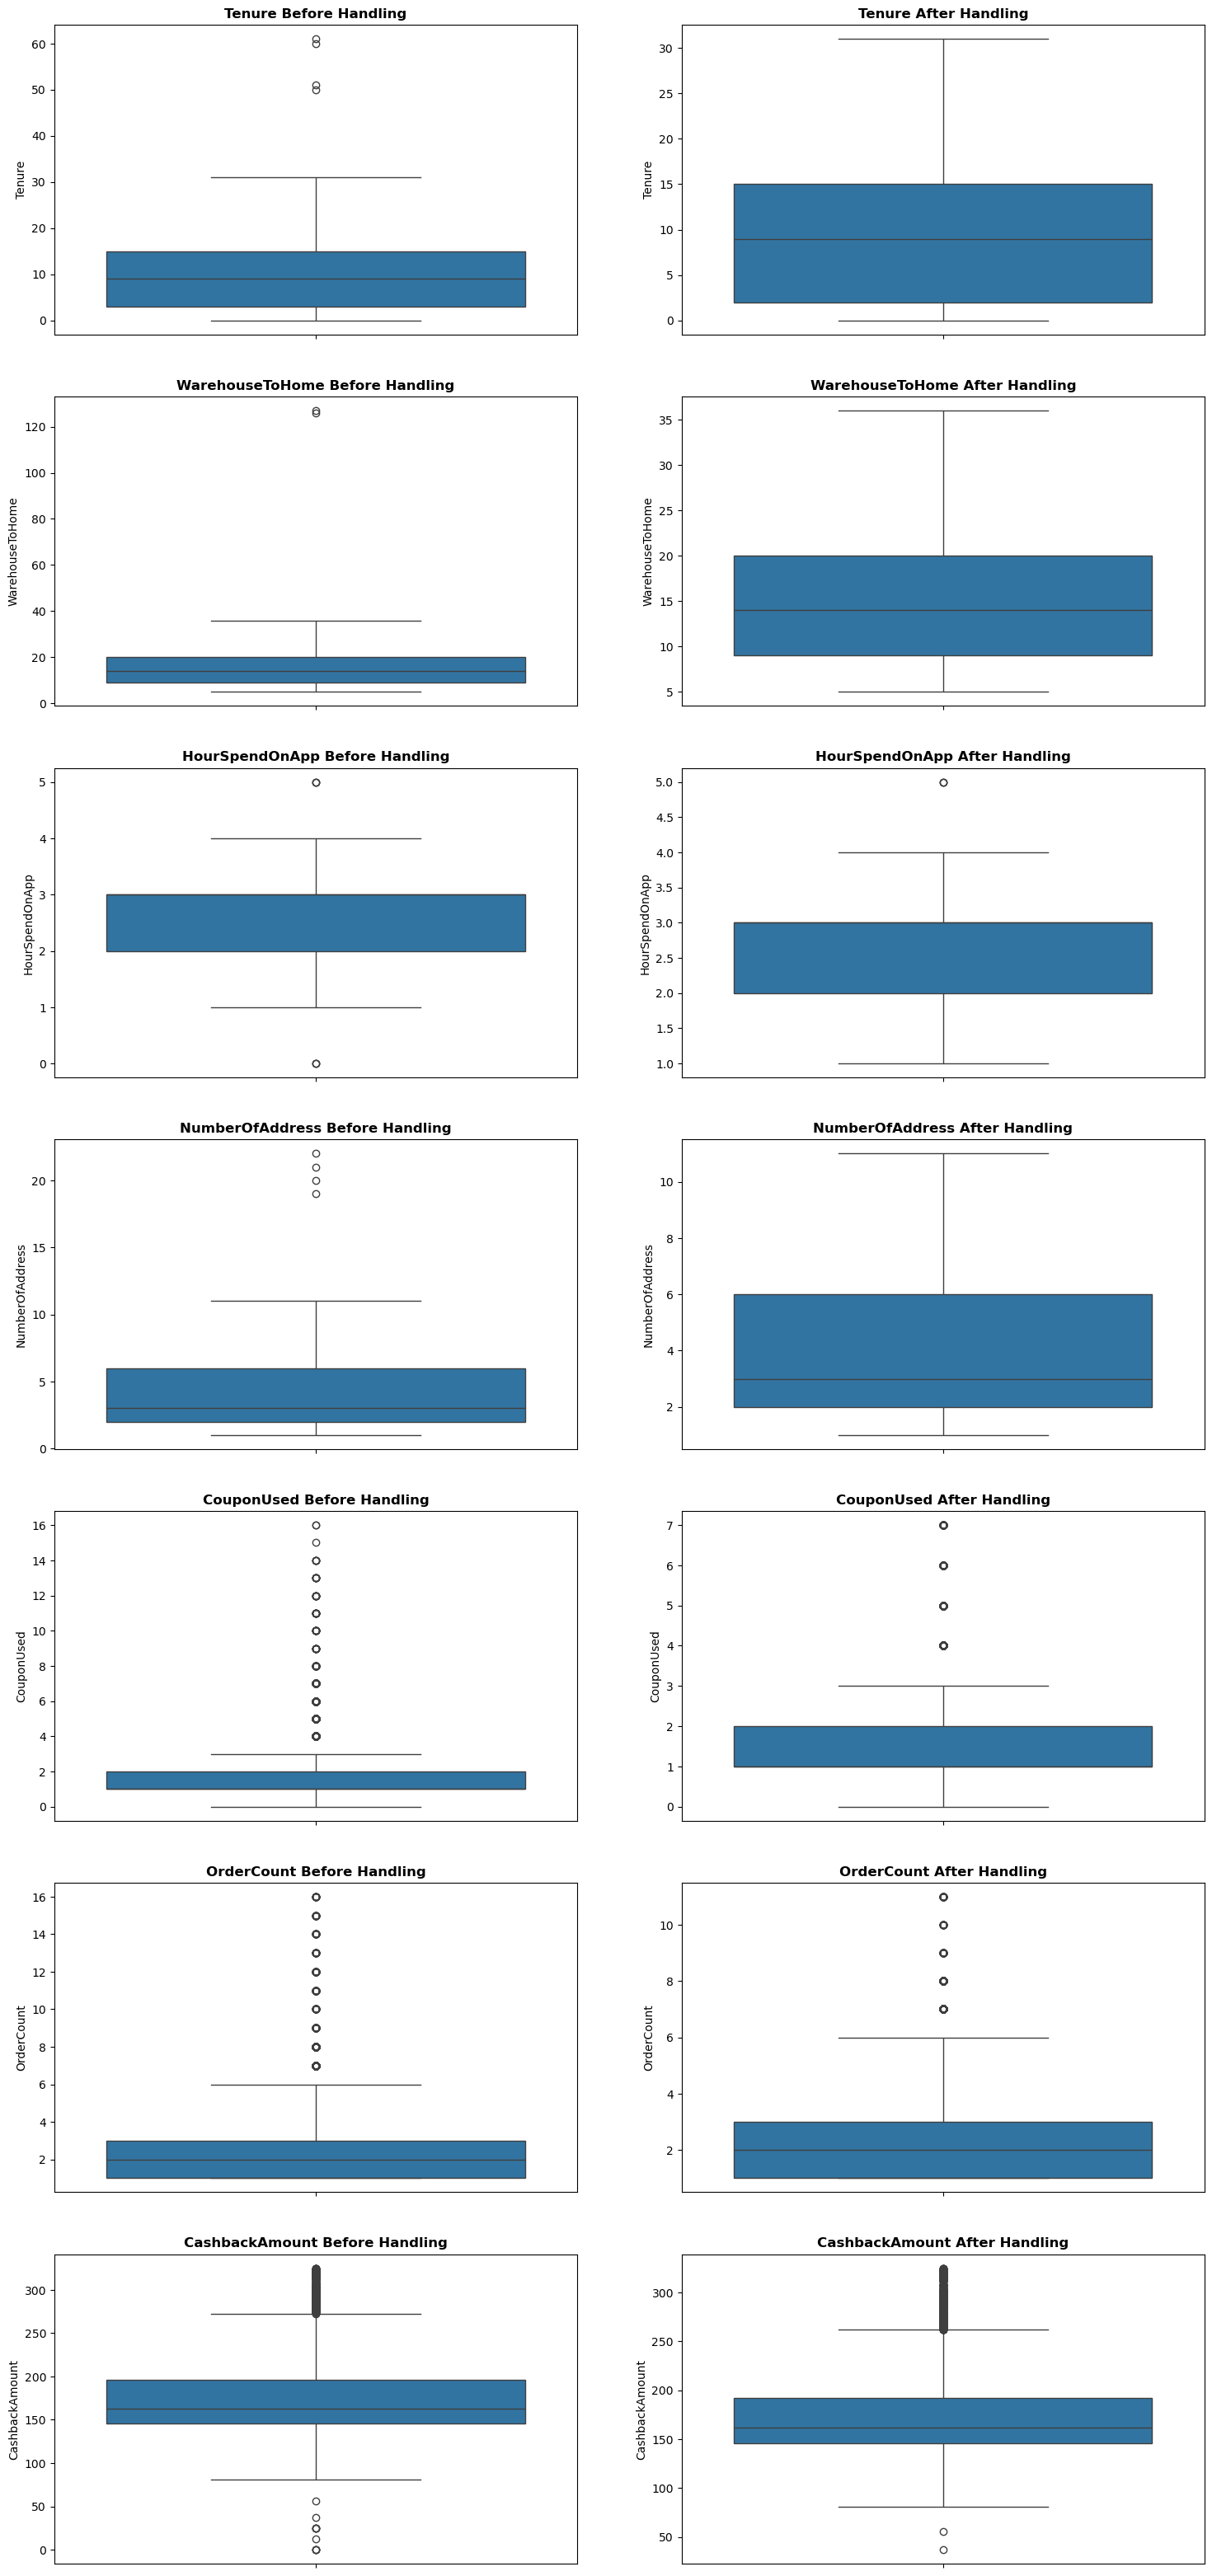

In [32]:
fig, ax = plt.subplots(7,2,figsize=(18,40))

sns.boxplot(df_outlama['Tenure'], ax=ax[0][0])
sns.boxplot(data['Tenure'], ax=ax[0][1])
ax[0][0].set_title('Tenure Before Handling', weight='bold')
ax[0][1].set_title('Tenure After Handling', weight='bold')

sns.boxplot(df_outlama['WarehouseToHome'], ax=ax[1][0])
sns.boxplot(data['WarehouseToHome'], ax=ax[1][1])
ax[1][0].set_title('WarehouseToHome Before Handling', weight='bold')
ax[1][1].set_title('WarehouseToHome After Handling', weight='bold')

sns.boxplot(df_outlama['HourSpendOnApp'], ax=ax[2][0])
sns.boxplot(data['HourSpendOnApp'], ax=ax[2][1])
ax[2][0].set_title('HourSpendOnApp Before Handling', weight='bold')
ax[2][1].set_title('HourSpendOnApp After Handling', weight='bold')

sns.boxplot(df_outlama['NumberOfAddress'], ax=ax[3][0])
sns.boxplot(data['NumberOfAddress'], ax=ax[3][1])
ax[3][0].set_title('NumberOfAddress Before Handling', weight='bold')
ax[3][1].set_title('NumberOfAddress After Handling', weight='bold')

sns.boxplot(df_outlama['CouponUsed'], ax=ax[4][0])
sns.boxplot(data['CouponUsed'], ax=ax[4][1])
ax[4][0].set_title('CouponUsed Before Handling', weight='bold')
ax[4][1].set_title('CouponUsed After Handling', weight='bold')

sns.boxplot(df_outlama['OrderCount'], ax=ax[5][0])
sns.boxplot(data['OrderCount'], ax=ax[5][1])
ax[5][0].set_title('OrderCount Before Handling', weight='bold')
ax[5][1].set_title('OrderCount After Handling', weight='bold')

sns.boxplot(df_outlama['CashbackAmount'], ax=ax[6][0])
sns.boxplot(data['CashbackAmount'], ax=ax[6][1])
ax[6][0].set_title('CashbackAmount Before Handling', weight='bold')
ax[6][1].set_title('CashbackAmount After Handling', weight='bold')

plt.show()

#### Feature Encoding

In [33]:
data['PreferredLoginDevice'].replace({'Mobile Phone' : 3,
                                      'Computer' : 2,
                                      'Phone' : 1}, inplace=True)
data['PreferredPaymentMode'].replace({'Debit Card' : 5,
                                      'Credit Card' : 4,
                                      'E wallet' : 3,
                                      'COD' : 2,
                                      'UPI' : 1}, inplace=True)

data = pd.get_dummies(data, columns=['Gender', 'PreferedOrderCat', 'MaritalStatus'])

In [34]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629
CustomerID,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,55621,55622,55623,55624,55625,55626,55627,55628,55629,55630
Churn,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
Tenure,4.0,9.0,9.0,0.0,0.0,0.0,9.0,9.0,13.0,9.0,...,3.0,14.0,13.0,5.0,1.0,10.0,13.0,1.0,23.0,8.0
PreferredLoginDevice,3,1,1,1,1,2,1,1,1,1,...,3,3,3,2,3,2,3,3,2,3
CityTier,3,1,1,3,1,1,3,1,3,1,...,1,3,3,1,3,1,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0,22.0,11.0,6.0,9.0,31.0,...,35.0,35.0,31.0,12.0,12.0,30.0,13.0,11.0,9.0,15.0
PreferredPaymentMode,5,1,5,5,4,5,2,4,3,5,...,4,3,3,4,1,4,4,5,4,4
HourSpendOnApp,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,...,4.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0
NumberOfDeviceRegistered,3,4,4,4,3,5,3,3,4,5,...,5,5,5,4,5,2,5,2,5,2
SatisfactionScore,2,3,3,5,5,5,2,2,3,3,...,5,5,1,5,3,1,5,4,4,3


#### Feature Selection

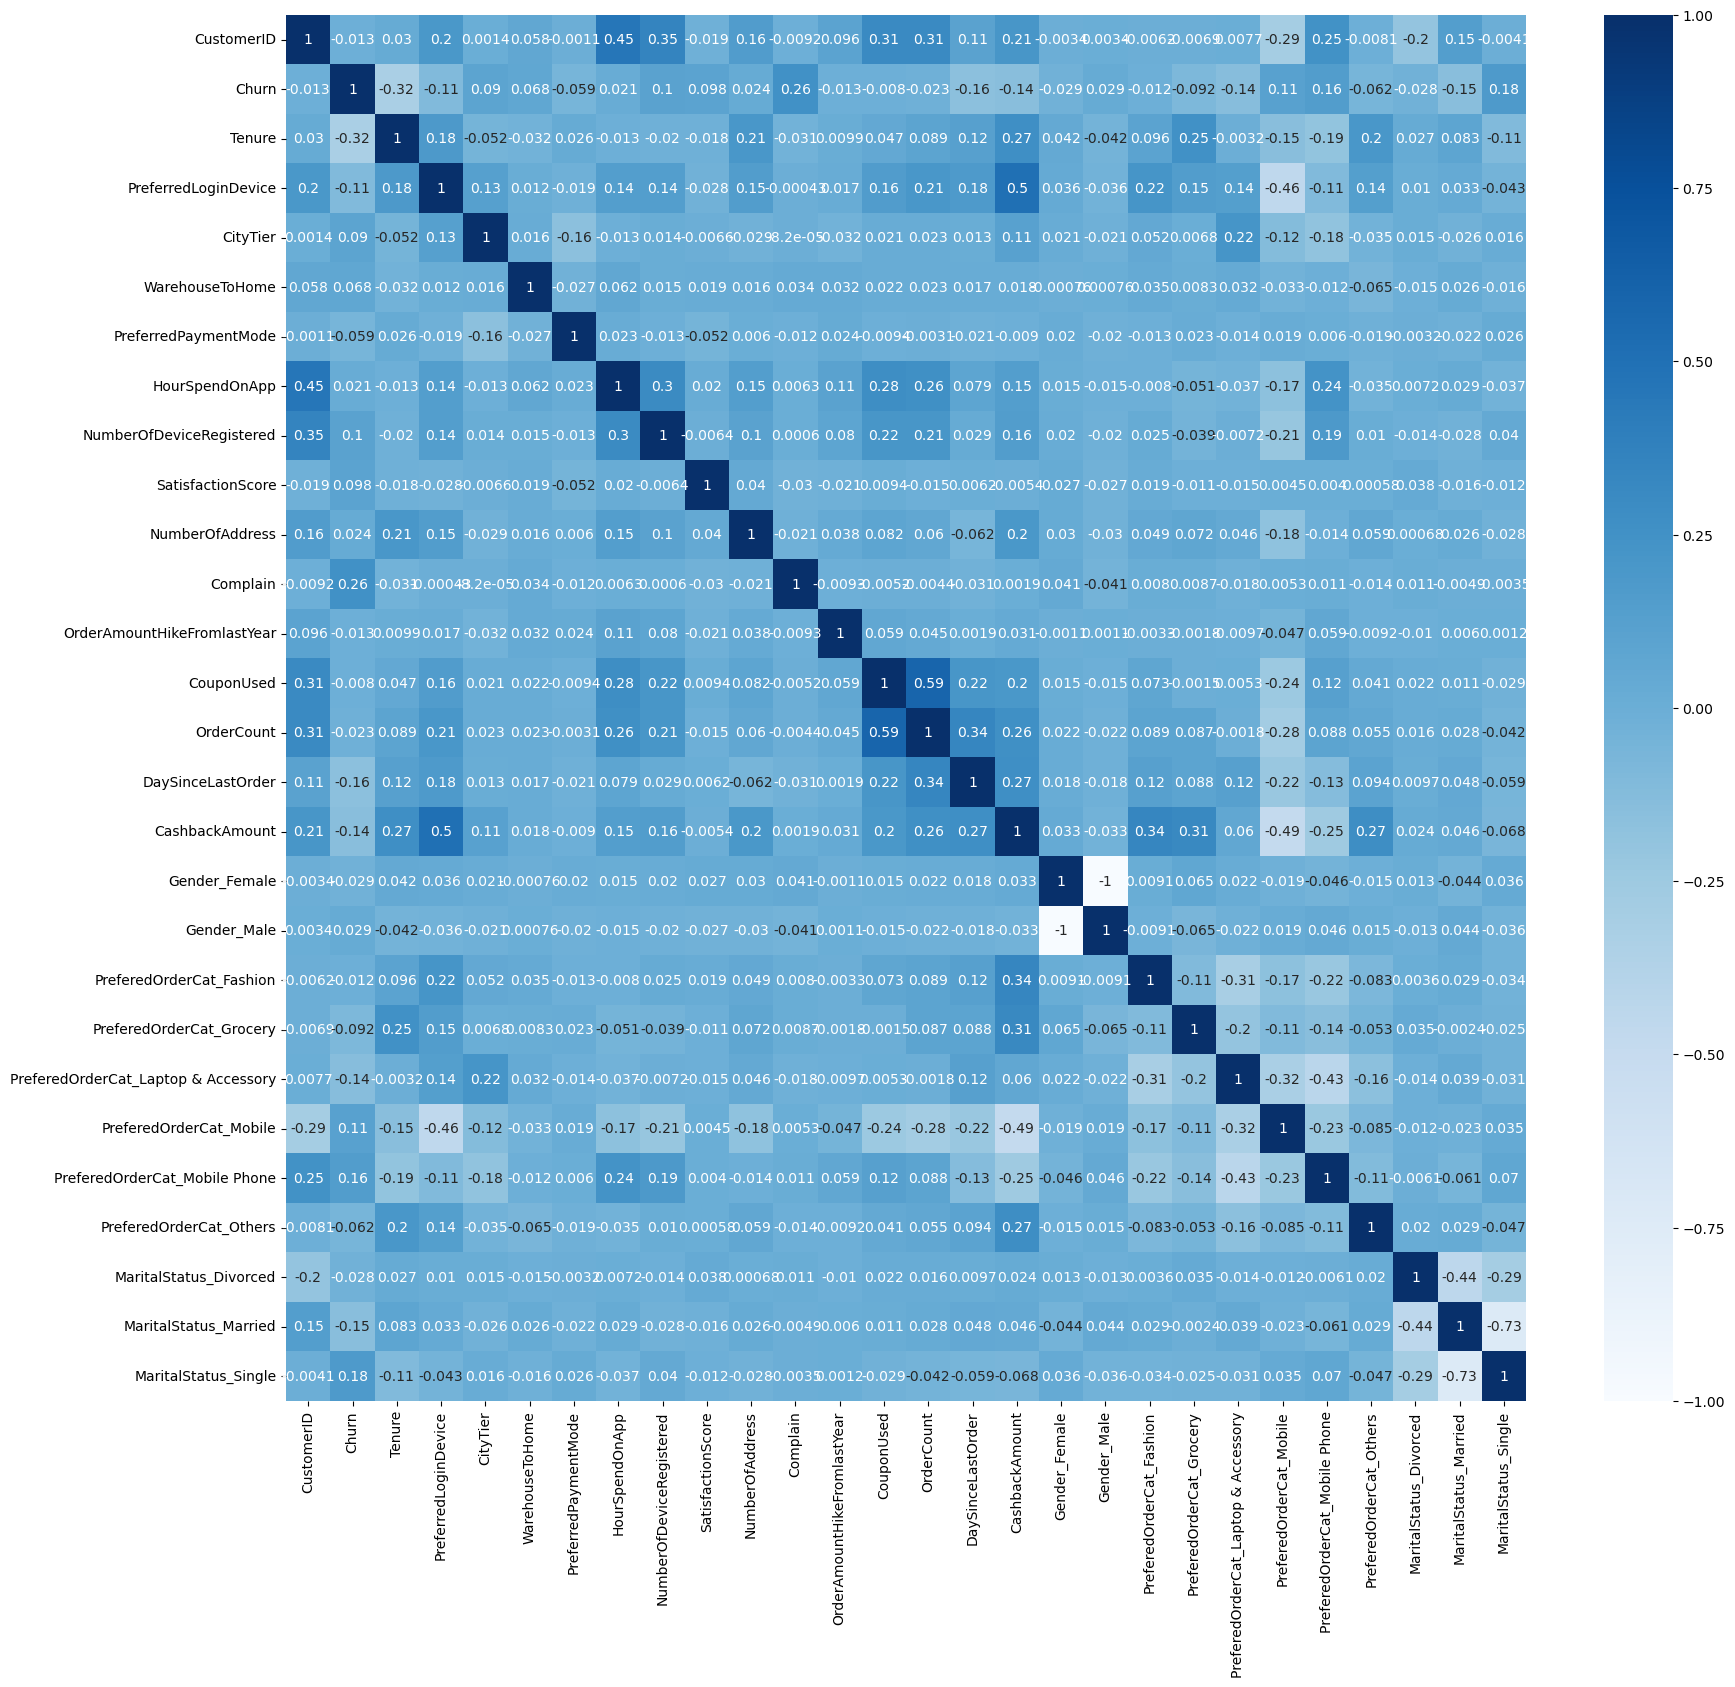

In [35]:
data_corr2 = data.corr(method='kendall')

plt.figure(figsize=(20,18))
sns.heatmap(data_corr2, annot=True, cmap='Blues')

plt.show()

In [36]:
data.drop(columns=['CustomerID',
                   'DaySinceLastOrder',
                   'Cashback_Tier',
                   'NumberOfAddress'], inplace=True)

#### Handling Imbalanced Data

In [37]:
data['Churn'].value_counts()

0    4463
1     913
Name: Churn, dtype: int64

In [38]:
from imblearn import over_sampling

y_imb = data['Churn']
x_imb = data.drop(columns=['Churn'])
x_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(x_imb, y_imb)
print(f"Data Sebelum Handling Imbalance Class :")
print(data['Churn'].value_counts())
print("")
print(f"Data Sesudah Handling Imbalance Class :")
print(y_over.value_counts())

Data Sebelum Handling Imbalance Class :
0    4463
1     913
Name: Churn, dtype: int64

Data Sesudah Handling Imbalance Class :
0    4463
1    2231
Name: Churn, dtype: int64


#### Spliting Dataset

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (5355, 24)
x_test shape : (1339, 24)
y_train shape : (5355,)
y_test shape : (1339,)


### Feature Scaling

In [40]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5355.0,8.708683,8.124516,0.0,1.000,8.00,14.00,31.00
PreferredLoginDevice,5355.0,2.223156,0.811103,1.0,2.000,2.00,3.00,3.00
CityTier,5355.0,1.699720,0.929445,1.0,1.000,1.00,3.00,3.00
WarehouseToHome,5355.0,15.829879,8.170142,5.0,9.000,14.00,21.00,36.00
PreferredPaymentMode,5355.0,3.864613,1.257094,1.0,3.000,4.00,5.00,5.00
HourSpendOnApp,5355.0,2.936881,0.697756,1.0,2.000,3.00,3.00,5.00
NumberOfDeviceRegistered,5355.0,3.730906,1.037874,1.0,3.000,4.00,4.00,6.00
SatisfactionScore,5355.0,3.099720,1.389213,1.0,2.000,3.00,4.00,5.00
Complain,5355.0,0.330159,0.470314,0.0,0.000,0.00,1.00,1.00
OrderAmountHikeFromlastYear,5355.0,15.661251,3.618414,11.0,13.000,15.00,18.00,26.00


In [41]:
from sklearn.preprocessing import StandardScaler

scaling = ['Tenure',
           'PreferredLoginDevice',
           'CityTier',
           'WarehouseToHome',
           'PreferredPaymentMode',
           'HourSpendOnApp',
           'NumberOfDeviceRegistered',
           'SatisfactionScore',
           'OrderAmountHikeFromlastYear',
           'OrderCount',
           'CashbackAmount',
           'CouponUsed']
scaler = StandardScaler()

for val_scal in range(0, len(scaling)):
    x_train[scaling[val_scal]] = scaler.fit_transform(x_train[scaling[val_scal]].values.reshape(len(x_train), 1))

for val_scal_test in range(0, len(scaling)):
    x_test[scaling[val_scal_test]] = scaler.fit_transform(x_test[scaling[val_scal_test]].values.reshape(len(x_test), 1))

In [42]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5355.0,8.558358e-17,1.000093,-1.072002,-0.948906,-0.087236,0.651339,2.743966
PreferredLoginDevice,5355.0,-1.449613e-16,1.000093,-1.508157,-0.275152,-0.275152,0.957853,0.957853
CityTier,5355.0,3.582568e-17,1.000093,-0.752907,-0.752907,-0.752907,1.399116,1.399116
WarehouseToHome,5355.0,-7.032449e-17,1.000093,-1.325667,-0.836034,-0.223992,0.632866,2.468991
PreferredPaymentMode,5355.0,-5.954361e-17,1.000093,-2.278971,-0.687851,0.107709,0.903269,0.903269
HourSpendOnApp,5355.0,3.237580e-16,1.000093,-2.776132,-1.342832,0.090468,0.090468,2.957068
NumberOfDeviceRegistered,5355.0,-6.070463e-17,1.000093,-2.631495,-0.704299,0.259299,0.259299,2.186495
SatisfactionScore,5355.0,-6.402182e-17,1.000093,-1.511587,-0.791688,-0.071788,0.648111,1.368010
Complain,5355.0,3.301587e-01,0.470314,0.000000,0.000000,0.000000,1.000000,1.000000
OrderAmountHikeFromlastYear,5355.0,1.685134e-16,1.000093,-1.288323,-0.735543,-0.182763,0.646407,2.857526


### Data Modeling

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [44]:
models = [('LogisticRegression', LogisticRegression()),
          ('SVM', SVC()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ("Gradient Boosting", GradientBoostingClassifier()),
          ('XGBoost', XGBClassifier())]

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_metrics(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    roc_score = roc_auc_score(ytest, y_pred)
    return accuracy, precision, recall, f1, roc_score

def eval_confusion_matrix(model, xtest, ytest):
    y_predict = model.predict(xtest)
    cm = confusion_matrix(ytest, y_predict)
    TP, FN, FP, TN = cm.ravel()
    return TP, FN, FP, TN

#### Training

In [46]:
result_eval = []

for name, model in models:
    model.fit(x_train, y_train)
    accuracy_train, precision_train, recall_train, f1_train, roc_score_train = eval_metrics(model, x_train, y_train)
    accuracy_test, precision_test, recall_test, f1_test, roc_score_test = eval_metrics(model, x_test, y_test)

    result_eval.append([name,
                        accuracy_train,
                        accuracy_test,
                        precision_train,
                        precision_test,
                        recall_train,
                        recall_test,
                        f1_train,
                        f1_test,
                        roc_score_train,
                        roc_score_test])

### Evaluation Model

In [47]:
data_train = pd.DataFrame(result_eval, columns=['Algorithms',
                                                'Accuracy_Train',
                                                'Accuracy_Test',
                                                'Precision_Train',
                                                'Precision_Test',
                                                'Recall_Train',
                                                'Recall_Test',
                                                'F1_Score_Train',
                                                'F1_Score_Test',
                                                'Roc_Auc_Score_Train',
                                                'Roc_Auc_Score_Test'])
data_train

,Algorithms,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1_Score_Train,F1_Score_Test,Roc_Auc_Score_Train,Roc_Auc_Score_Test
0,LogisticRegression,0.812885,0.816281,0.747585,0.768844,0.655562,0.665217,0.698556,0.713287,0.773093,0.780276
1,SVM,0.916340,0.897685,0.891189,0.872979,0.850932,0.821739,0.870595,0.846585,0.899796,0.879584
2,DecisionTree,1.000000,0.968633,1.000000,0.931818,1.000000,0.980435,1.000000,0.955508,1.000000,0.971446
3,KNN,0.949953,0.897685,0.887172,0.819802,0.972332,0.900000,0.927802,0.858031,0.955614,0.898237
4,RandomForest,1.000000,0.988051,1.000000,0.974359,1.000000,0.991304,1.000000,0.982759,1.000000,0.988826
5,AdaBoost,0.844071,0.821509,0.779236,0.766265,0.737436,0.691304,0.757760,0.726857,0.817100,0.790476
6,Gradient Boosting,0.889262,0.863331,0.856970,0.840295,0.798419,0.743478,0.826659,0.788927,0.866285,0.834765
7,XGBoost,1.000000,0.904406,1.000000,0.971591,1.000000,0.743478,1.000000,0.842365,1.000000,0.866051


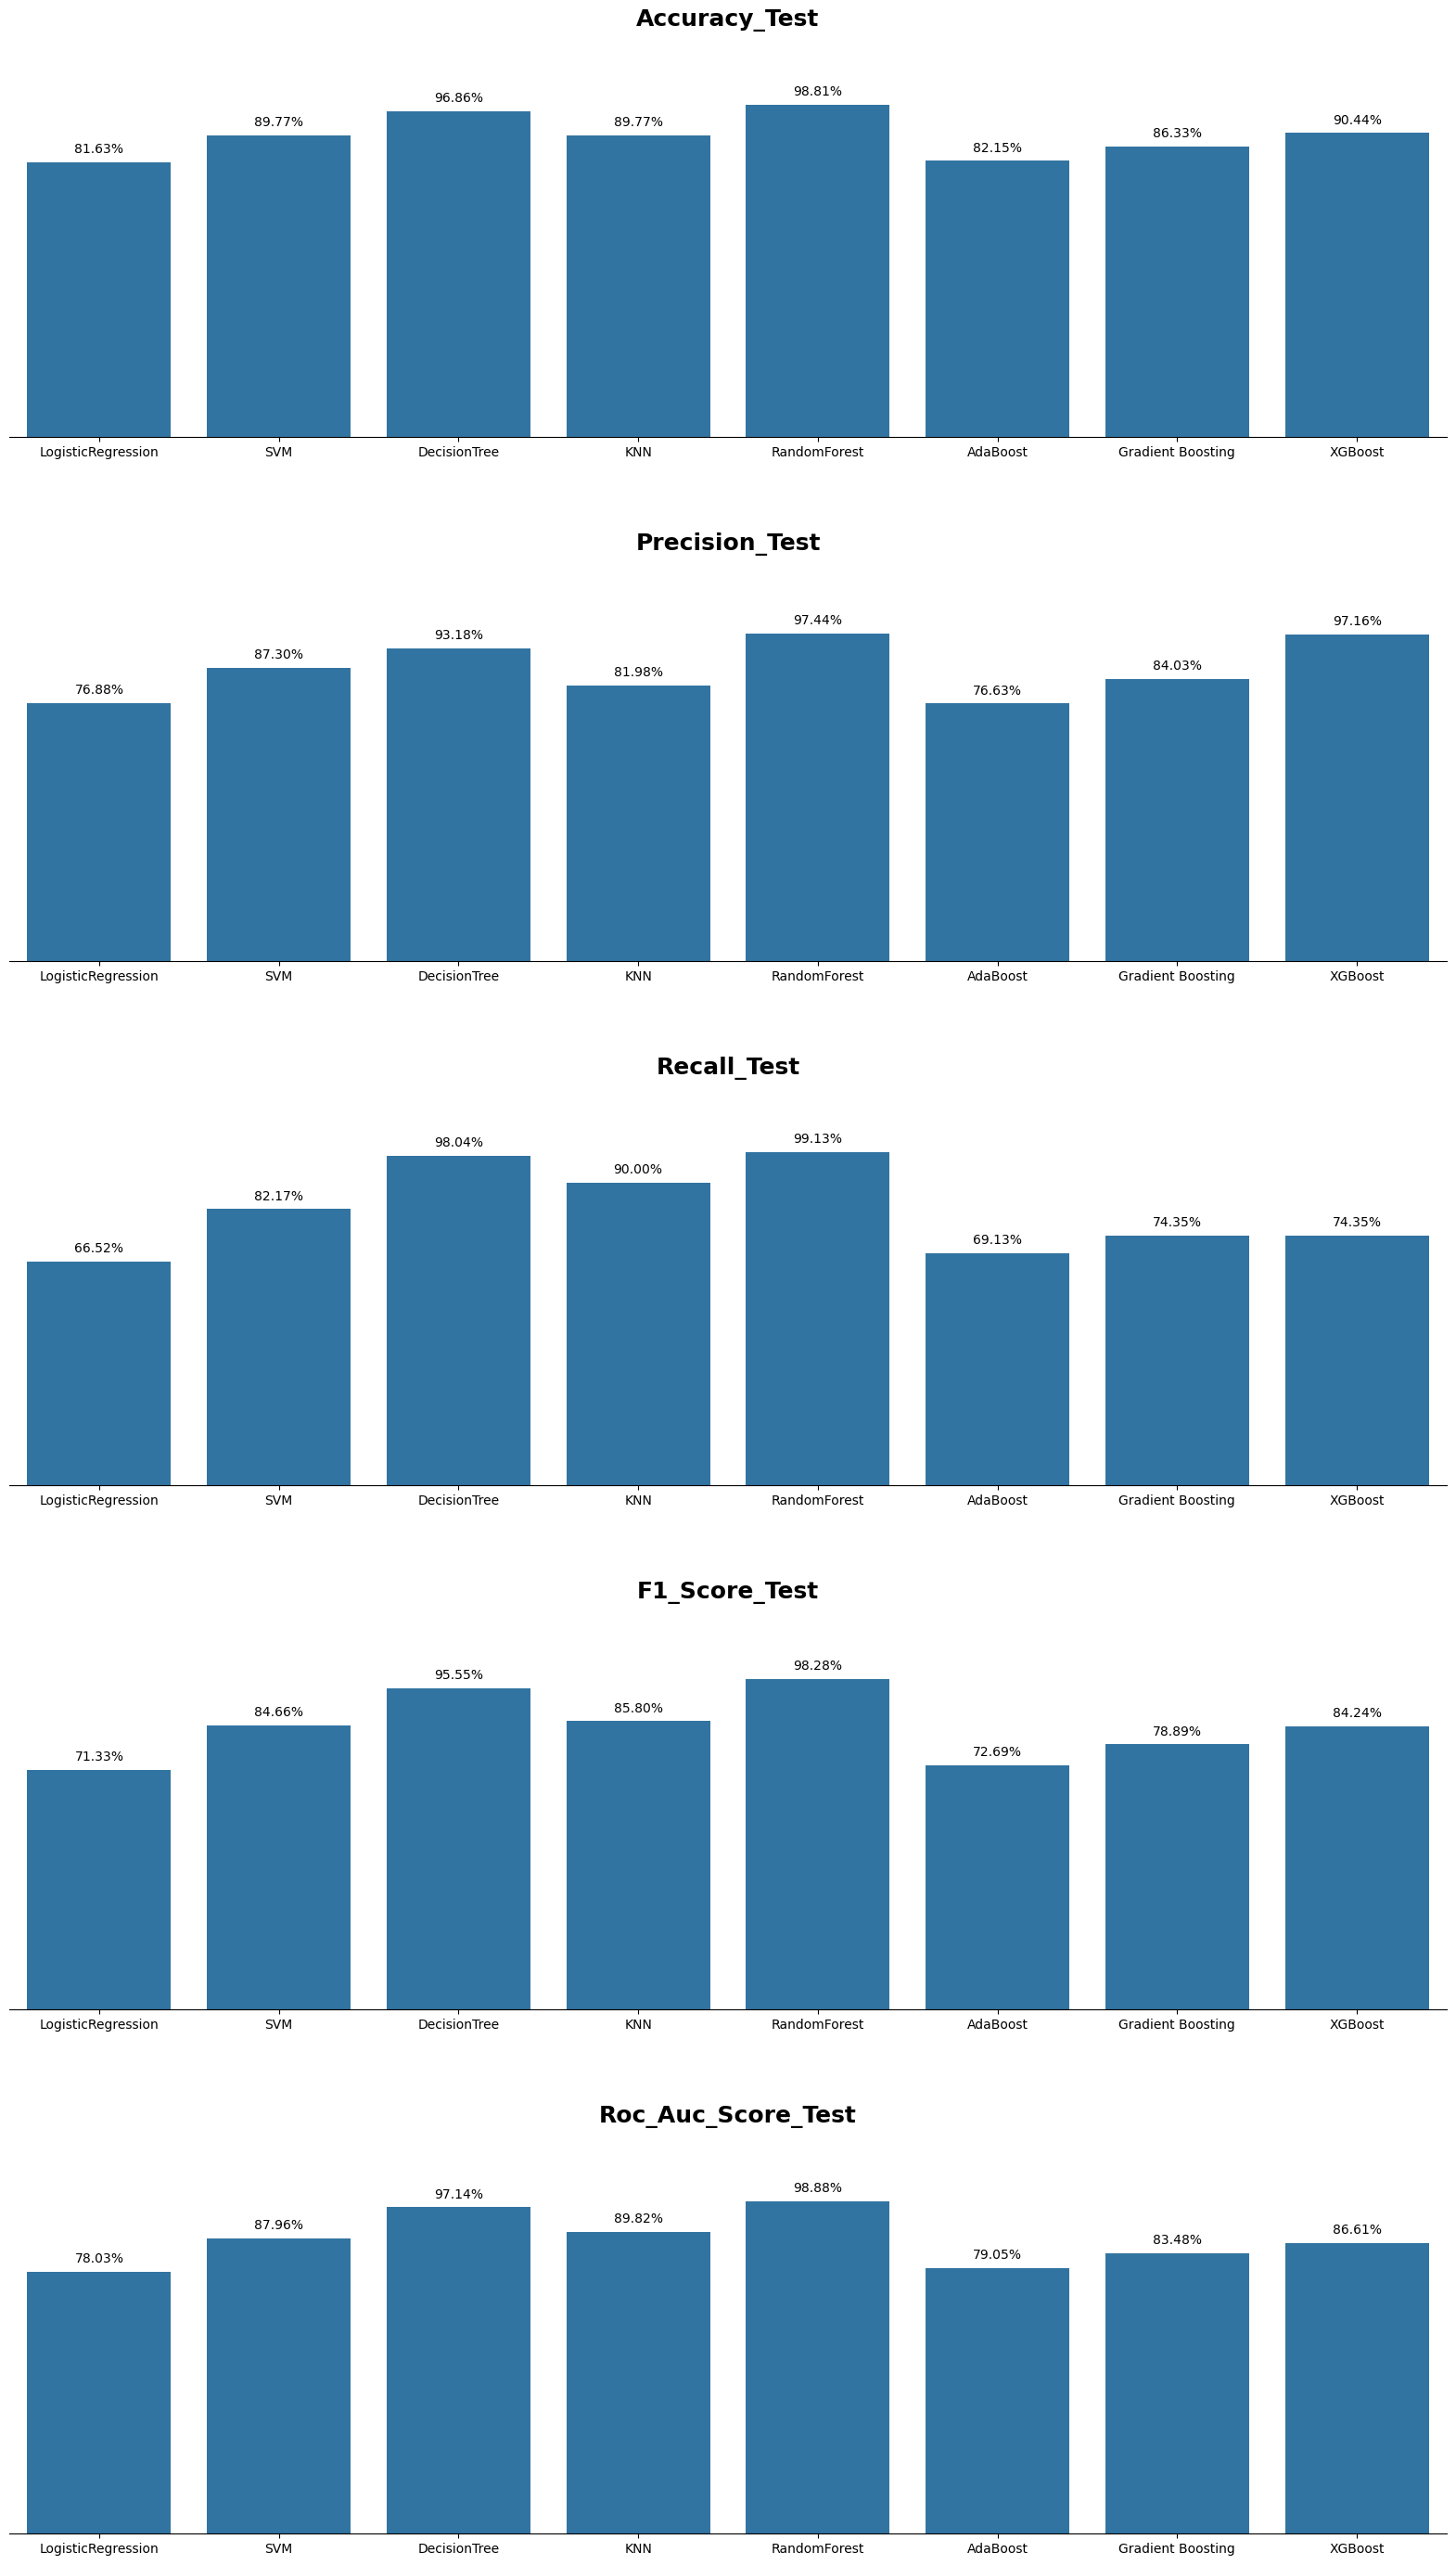

In [48]:
#Visualization DatFrame Training Result
data_result_vis = data_train[['Algorithms', 'Accuracy_Test', 'Precision_Test', 'Recall_Test', 'F1_Score_Test', 'Roc_Auc_Score_Test']]
data_result_columns = data_result_vis.drop(columns=['Algorithms']).columns

plt.figure(figsize=(20,35))
for vis_result in range(0, len(data_result_columns)):
    plt.subplot(5, 1, vis_result+1)
    plt.grid(visible=False)
    plt.subplots_adjust(hspace=0.3)
    vis = sns.barplot(data=data_result_vis, x=data_result_vis.columns[0], y=data_train[data_result_columns[vis_result]])
    sns.despine(left=True)
    plt.title(data_result_columns[vis_result], weight='bold', fontsize=18)
    plt.xlabel("")
    plt.yticks([])
    plt.ylabel("")
    plt.ylim(0, 1.2)

    def percen(data):
        return "{:,.2f}%".format(data*100)

    for annot_vis in vis.patches:
        plt.annotate(percen(annot_vis.get_height()),
                     (annot_vis.get_x() + annot_vis.get_width()/2, annot_vis.get_height()),
                     va='center', ha='center',
                     xytext=(0,10),
                     textcoords='offset points')

plt.show()

### Hyperparameter Tuning

In [49]:
param_grid = {
    'bootstrap' : [True],
    'max_depth' : [25,45,50,75],
    'max_features' : [3,4,5,6,7,8],
    'min_samples_leaf' : [2,3,4],
    'min_samples_split' : [5,7,10,12,15],
    'n_estimators' : [50,75,100,125]
}

In [50]:
from sklearn.model_selection import GridSearchCV

model_hyper = RandomForestClassifier()
grid_search = GridSearchCV(model_hyper, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [25, 45, 50, 75],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 7, 10, 12, 15],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='roc_auc', verbose=2)

In [51]:
print(f"Best Score : {grid_search.score(x_test, y_test)}")
print(f"Best Parameters : {grid_search.best_params_}")

Best Score : 0.9966612257011426
Best Parameters : {'bootstrap': True, 'max_depth': 45, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [57]:
param_final = {
    'bootstrap' : True,
    'max_depth' : 45,
    'max_features' : 8,
    'min_samples_leaf' : 2,
    'min_samples_split' : 5,
    'n_estimators' : 100
}

final_model = RandomForestClassifier(**param_final)
final_model.fit(x_train, y_train)

TN_final, FP_final, FN_final, TP_final = eval_confusion_matrix(final_model, x_test, y_test)
accuracy_final, precision_final, recall_final, f1_final, roc_score_final = eval_metrics(final_model, x_test, y_test)

In [58]:
val_final = [['RandomForestClasssifier', accuracy_final, precision_final, recall_final, f1_final, roc_score_final]]
data_model_fin = pd.DataFrame(val_final, columns=['Algorithmns',
                                                   'Accuracy',
                                                   'Precision',
                                                   'Recall',
                                                   'F1_Score',
                                                   'ROC_AUC_Score'])
data_model_fin

,Algorithmns,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score
0,RandomForestClasssifier,0.977595,0.963362,0.971739,0.967532,0.976199


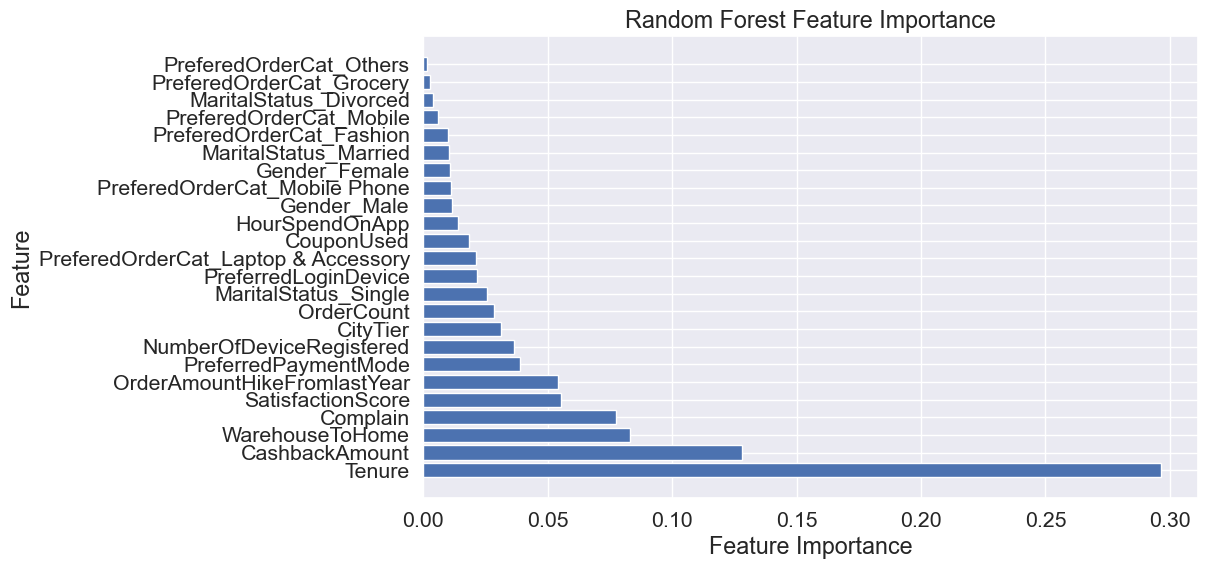

In [59]:
feature_important = final_model.feature_importances_
feature_name = list(x_train.columns)

df_importance = pd.DataFrame({'Feature' : feature_name, 'Importance' : feature_important})
df_importance = df_importance.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

#### Business Simulation

<Axes: xlabel='Churn'>

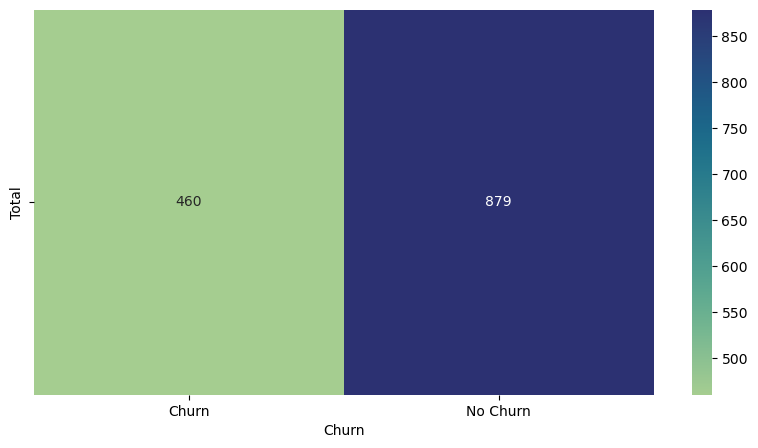

In [55]:
y_sim = y_test.value_counts().reset_index()
y_sim.columns=['Churn', 'Total']
y_sim['Churn'] = y_sim['Churn'].replace({1 : 'Churn',
                                         0 : 'No Churn'})
y_sim = y_sim.pivot_table(index=None, columns='Churn', values='Total')


plt.figure(figsize=(10,5))
sns.heatmap(y_sim, annot=True, fmt='d', cmap='crest')

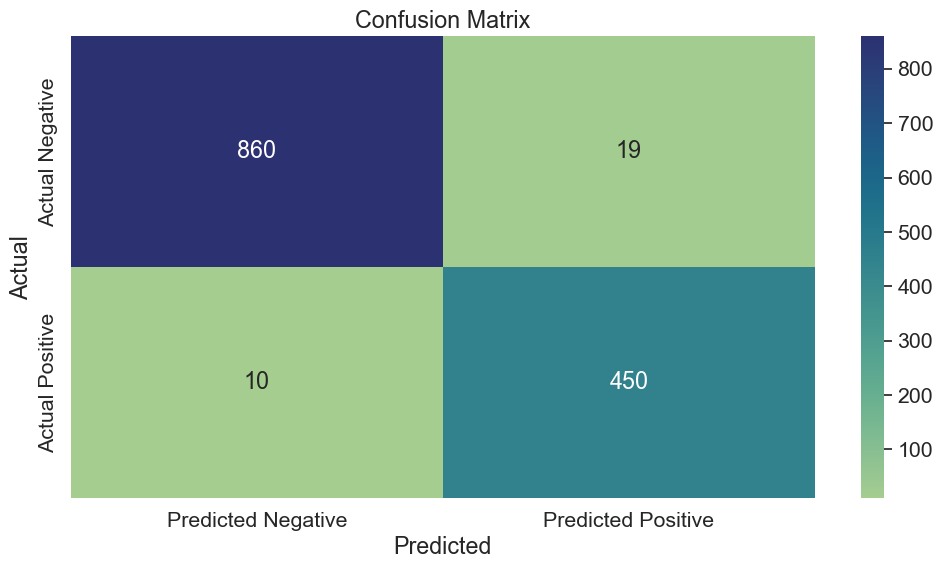

In [56]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.4) # Atur skala font untuk visualisasi yang lebih baik
sns.heatmap([[TN_final, FP_final], [FN_final, TP_final]], annot=True, fmt='g', cmap='crest', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()